In [11]:
%pip install scikit-learn==1.6.1 matplotlib seaborn pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: C:\Users\Marco\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Exploratory data analysis

As usual, we start by taking at look at the dataset.

* IDS_mapping.csv file isn't structured as a normal CSV because it contains multiple tables within one file

In [5]:
# Load the data
ids_mapping = pd.read_csv("./data/IDS_mapping.csv", quotechar='"')
pd.set_option('display.max_rows', None)  # Display all rows
ids_mapping

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped
8,NaN,NaN
9,discharge_disposition_id,description


🔍 Solution: Read and Split the File Correctly
Since Pandas can’t read it directly, we need to:

1. Read the file as raw text.
2. Split it into separate dataframes based on blank lines.
3. Process and clean each dataframe.

In [6]:
# Read the raw file
with open("./data/IDS_mapping.csv", "r") as f:
    lines = f.read().split("\n")  # Split by line

📌 Identify the Different Tables in "IDS_mapping.csv"

Each section has:

* A header (column names) followed by data.
* A comma line separating different tables.

We need to extract:

1. admission_type_id mapping
2. discharge_disposition_id mapping
3. admission_source_id mapping

In [7]:
# Find table starting points
tables = []
current_table = []

for line in lines:
    if line != ',':  # If line is NOT a comma
        current_table.append(line)
    else:  # If empty line, save previous table and start new
        if current_table:
            tables.append(current_table)
            current_table = []

# Add last table if exists
if current_table:
    tables.append(current_table)

# Check how many tables were found
print(f"Found {len(tables)} tables")
admission_type_id = tables[0]
discharge_disposition_id = tables[1]
admission_source_id = tables[2]

print(admission_type_id)
print(discharge_disposition_id) 
print(admission_source_id)


Found 3 tables
['admission_type_id,description', '1,Emergency', '2,Urgent', '3,Elective', '4,Newborn', '5,Not Available', '6,NULL', '7,Trauma Center', '8,Not Mapped']
['discharge_disposition_id,description', '1,Discharged to home', '2,Discharged/transferred to another short term hospital', '3,Discharged/transferred to SNF', '4,Discharged/transferred to ICF', '5,Discharged/transferred to another type of inpatient care institution', '6,Discharged/transferred to home with home health service', '7,Left AMA', '8,Discharged/transferred to home under care of Home IV provider', '9,Admitted as an inpatient to this hospital', '10,Neonate discharged to another hospital for neonatal aftercare', '11,Expired', '12,Still patient or expected to return for outpatient services', '13,Hospice / home', '14,Hospice / medical facility', '15,Discharged/transferred within this institution to Medicare approved swing bed', '16,Discharged/transferred/referred another institution for outpatient services', '17,Disc

#### admission_type_id table extraction

In [16]:
import csv

# Split the list into rows (each entry in the list represents a row in the CSV)
rows = [row.split(',') for row in admission_type_id]

# Define the output CSV file name
output_file_admission_type_id = './output_data/admission_type_id.csv'

# Write to CSV
with open(output_file_admission_type_id, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows)

print(f"CSV file '{output_file_admission_type_id}' created successfully.")

CSV file './output_data/admission_type_id.csv' created successfully.


In [17]:
# Load the data admission_type_id
admission_type_id = pd.read_csv("./output_data/admission_type_id.csv")
pd.set_option('display.max_rows', None)  # Display all rows
admission_type_id

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


In [ ]:
# Load dataset
diabetic_data_placeholders_substituted_placeholders_substituted = pd.read_csv("./data/diabetic_data.csv")

pd.set_option('display.max_columns', None)  # Display all cols

# Display first few rows
display(diabetic_data.head())

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


#### discharge_disposition_id table extraction

In [19]:
import csv

# Split the list into rows (each entry in the list represents a row in the CSV)
rows = [row.split(',') for row in discharge_disposition_id]

# Define the output CSV file name
output_file_discharge_disposition_id = './output_data/discharge_disposition_id.csv'

# Write to CSV
with open(output_file_discharge_disposition_id, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows)

print(f"CSV file '{output_file_discharge_disposition_id}' created successfully.")

CSV file './output_data/discharge_disposition_id.csv' created successfully.


In [8]:
# Load the data discharge_disposition_id
discharge_disposition_id = pd.read_csv("./output_data/discharge_disposition_id.csv", quotechar='"')
pd.set_option('display.max_rows', None)  # Display all rows
discharge_disposition_id

,discharge_disposition_id,description
0,1,Discharged to home
1,2,Discharged/transferred to another short term h...
2,3,Discharged/transferred to SNF
3,4,Discharged/transferred to ICF
4,5,Discharged/transferred to another type of inpa...
5,6,Discharged/transferred to home with home healt...
6,7,Left AMA
7,8,Discharged/transferred to home under care of H...
8,9,Admitted as an inpatient to this hospital
9,10,Neonate discharged to another hospital for neo...


#### admission_source_id table extraction

In [22]:
import csv

# Split the list into rows (each entry in the list represents a row in the CSV)
rows = [row.split(',') for row in admission_source_id]

# Define the output CSV file name
output_file_admission_source_id = './output_data/admission_source_id.csv'

# Write to CSV
with open(output_file_admission_source_id, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows)

print(f"CSV file '{output_file_admission_source_id}' created successfully.")

CSV file './output_data/admission_source_id.csv' created successfully.


In [9]:
# Load the data admission_source_id
admission_source_id = pd.read_csv("./output_data/admission_source_id.csv", quotechar='"')
pd.set_option('display.max_rows', None)  # Display all rows
admission_source_id

,admission_source_id,description
0,1.0,Physician Referral
1,2.0,Clinic Referral
2,3.0,HMO Referral
3,4.0,Transfer from a hospital
4,5.0,Transfer from a Skilled Nursing Facility (SNF)
5,6.0,Transfer from another health care facility
6,7.0,Emergency Room
7,8.0,Court/Law Enforcement
8,9.0,Not Available
9,10.0,Transfer from critial access hospital


### Task 1: Dataset description (15%)
1.1 Describe the characteristics of the dataset (e.g. data types, sample-to-features ratio) and
use descriptive statistics and figures/plots to show the dataset characteristics.

1.2 Describe the challenges with the dataset (e.g. missing data, unbalanced classes). (5%)

---

1.1 and 1.2 Identify Data Characteristics, and describe the challenges within the dataset:
* a. Data Types: Determine whether the features in your dataset are numerical (e.g., integers, floats) or categorical (e.g., strings, boolean values).
* b. Sample-to-Feature Ratio: This refers to the number of samples (rows) in the dataset relative to the number of features (columns). A common ratio is to have more samples than features, but some datasets might have more features than samples.
* c. Missing Values: Check if there are missing values in any of the features and how they are handled.
* d. Outliers: Look for any outliers or unusual values in the dataset that might affect analysis.

In [10]:
diabetic_data = pd.read_csv("./data/diabetic_data.csv")

In [11]:
# Replace missing values with NaN

# Define a list of common placeholders
placeholders = ['?', 'NA', 'none', 'N/A', 'null']

diabetic_data_placeholders_substituted = diabetic_data.copy(deep=True)

# Replace all placeholder values with NaN across the entire DataFrame
diabetic_data_placeholders_substituted.replace(placeholders, None, inplace=True)

In [48]:
analyze_dataframe(diabetic_data_placeholders_substituted)

DataFrame - Data Types of Features:
encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide     

C:\Users\Marco\AppData\Local\Temp\ipykernel_1580\1076541090.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='raise')  # Will raise an error if not convertible
C:\Users\Marco\AppData\Local\Temp\ipykernel_1580\1076541090.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='raise')  # Will raise an error if not convertible
C:\Users\Marco\AppData\Local\Temp\ipykernel_1580\1076541090.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='raise')  # Will


Corrected Data Types:
encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              obje

C:\Users\Marco\AppData\Local\Temp\ipykernel_1580\1076541090.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='raise')  # Will raise an error if not convertible
C:\Users\Marco\AppData\Local\Temp\ipykernel_1580\1076541090.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='raise')  # Will raise an error if not convertible
C:\Users\Marco\AppData\Local\Temp\ipykernel_1580\1076541090.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='raise')  # Will

In [25]:
print("Missing Values in Each Feature:")
missing_values = diabetic_data_placeholders_substituted.isnull().sum()
print(missing_values)
# Check for missing values

Missing Values in Each Feature:
encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride     

In [ ]:
diabetic_data_placeholders_substituted.to_csv('./output_data/replaced_placeholders_with_nan.csv', sep=',', index=False, encoding='utf-8')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def analyze_dataframe(df, df_name="DataFrame"):
    # Prepare the output text
    output_text = []

    # a. Identify Data Types for every CSV file
    print(f"{df_name} - Data Types of Features:")
    print(df.dtypes)
    print(f"{df_name} - Shape: " , df.shape)

    # b. Sample-to-Feature Ratio
    num_samples = df.shape[0]  # Number of rows (samples)
    num_features = df.shape[1]  # Number of columns (features)
    print(f"\n{df_name} - Sample-to-Feature Ratio:")
    print(f"Number of Samples: {num_samples}")
    print(f"Number of Features: {num_features}")
    print(f"Sample-to-Feature Ratio: {num_samples / num_features:.2f}")

    # c. Missing Values
    print(f"\n{df_name} - Missing Values in Each Feature:")
    missing_values = df.isnull().sum()
    print(missing_values)

    # c.1. Missing Values Percentage
    print(f"\n{df_name} - Missing Values Percentage:")
    missing_values_percentage = (missing_values / len(df)) * 100
    print(missing_values_percentage)

    # d. Summary Statistics
    print(f"\n{df_name} - Summary Statistics:")
    summary_statistics = df.describe(include='all')

    # d.1 Print Statistics in a more readable format
    print(f"\n{df_name} - Summary Statistics:")
    print(summary_statistics)

    # e. Check for coerence in data types
    print(f"\n{df_name} - Check for coherence in data types:")


    # Convert columns that look like dates (strings in date format) to datetime
    for col in df.select_dtypes(include='object').columns:
        try:
            # Try converting to datetime
            df[col] = pd.to_datetime(df[col], errors='raise')  # Will raise an error if not convertible
            print(f"Converted {col} to 'datetime'")
        except (ValueError, TypeError):
            pass

    # Check the final data types
    print("\nCorrected Data Types:")
    print(df.dtypes)



In [ ]:
# Analyze the diabetic_data.csv DataFrame
# analyze_dataframe(diabetic_data, "diabetic_data.csv DataFrame") - without replacing placeholders

In [ ]:
# Analyze the admission_source_id.csv DataFrame
analyze_dataframe(admission_source_id, "admission_source_id.csv DataFrame")

admission_source_id.csv DataFrame - Data Types of Features:
admission_source_id    float64
description             object
dtype: object
admission_source_id.csv DataFrame - Shape:  (26, 2)

admission_source_id.csv DataFrame - Sample-to-Feature Ratio:
Number of Samples: 26
Number of Features: 2
Sample-to-Feature Ratio: 13.00

admission_source_id.csv DataFrame - Missing Values in Each Feature:
admission_source_id    1
description            2
dtype: int64


In [ ]:
# Analyze the admission_type_id.csv DataFrame
analyze_dataframe(admission_type_id, "admission_type_id.csv DataFrame")

admission_type_id.csv DataFrame - Data Types of Features:
admission_type_id     int64
description          object
dtype: object
admission_type_id.csv DataFrame - Shape:  (8, 2)

admission_type_id.csv DataFrame - Sample-to-Feature Ratio:
Number of Samples: 8
Number of Features: 2
Sample-to-Feature Ratio: 4.00

admission_type_id.csv DataFrame - Missing Values in Each Feature:
admission_type_id    0
description          1
dtype: int64


In [ ]:
# Analyze the discharge_disposition_id.csv DataFrame
analyze_dataframe(discharge_disposition_id, "discharge_disposition_id.csv DataFrame")

discharge_disposition_id.csv DataFrame - Data Types of Features:
discharge_disposition_id     int64
description                 object
dtype: object
discharge_disposition_id.csv DataFrame - Shape:  (30, 2)

discharge_disposition_id.csv DataFrame - Sample-to-Feature Ratio:
Number of Samples: 30
Number of Features: 2
Sample-to-Feature Ratio: 15.00

discharge_disposition_id.csv DataFrame - Missing Values in Each Feature:
discharge_disposition_id    0
description                 1
dtype: int64


In [8]:
# Load the diabetic_data_placeholders_with_nan.csv
diabetic_data_placeholders_substituted = pd.read_csv("./output_data/replaced_placeholders_with_nan.csv")

C:\Users\Marco\AppData\Local\Temp\ipykernel_9288\135843548.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  diabetic_data_placeholders_substituted = pd.read_csv("./output_data/replaced_placeholders_with_nan.csv")


In [6]:
# Load the admission_source_id.csv
admission_source_id = pd.read_csv("./output_data/admission_source_id.csv")

# Load the admission_type_id.csv
admission_type_id = pd.read_csv("./output_data/admission_type_id.csv")

# Load the discharge_disposition_id.csv
discharge_disposition_id = pd.read_csv("./output_data/discharge_disposition_id.csv")

In [9]:
# join the three dataframes into diabetic_data_placeholders_substituted dataframe

diabetic_data_placeholders_substituted = diabetic_data_placeholders_substituted.merge(admission_type_id, how="left", left_on="admission_type_id", right_on="admission_type_id")
diabetic_data_placeholders_substituted = diabetic_data_placeholders_substituted.merge(discharge_disposition_id, how="left", left_on="discharge_disposition_id", right_on="discharge_disposition_id")
diabetic_data_placeholders_substituted = diabetic_data_placeholders_substituted.merge(admission_source_id, how="left", left_on="admission_source_id", right_on="admission_source_id")

# Check the columns after each merge to ensure they are correct
print(diabetic_data_placeholders_substituted.columns)

# Rename the columns correctly
diabetic_data_placeholders_substituted.rename(columns={"description_x": "admission_type_id_description", 
                     "description_y": "discharge_disposition_id_description", 
                     "description": "admission_source_id_description"}, inplace=True)

# Verify the columns after renaming
print(diabetic_data_placeholders_substituted.columns)

print(diabetic_data_placeholders_substituted.head())

print(diabetic_data_placeholders_substituted[['admission_type_id', 'admission_type_id_description']].head())
print(diabetic_data_placeholders_substituted[['discharge_disposition_id', 'discharge_disposition_id_description']].head())
print(diabetic_data_placeholders_substituted[['admission_source_id', 'admission_source_id_description']].head())

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'description_x', 'description_y', 'description'],
      dtype='object')
Index(['encou

In [10]:
# Save the merged DataFrame to a new CSV file
diabetic_data_placeholders_substituted.to_csv('./output_data/diabetic_data_placeholders_substituted_merged_ids_mapping.csv', sep=',', index=False, encoding='utf-8')

#### Visualise distributions

We can now plot some graphs showing the data distribution for all features in the dataset.
There are quite a few features in the dataset: we split them in different groups when plotting their distributions.

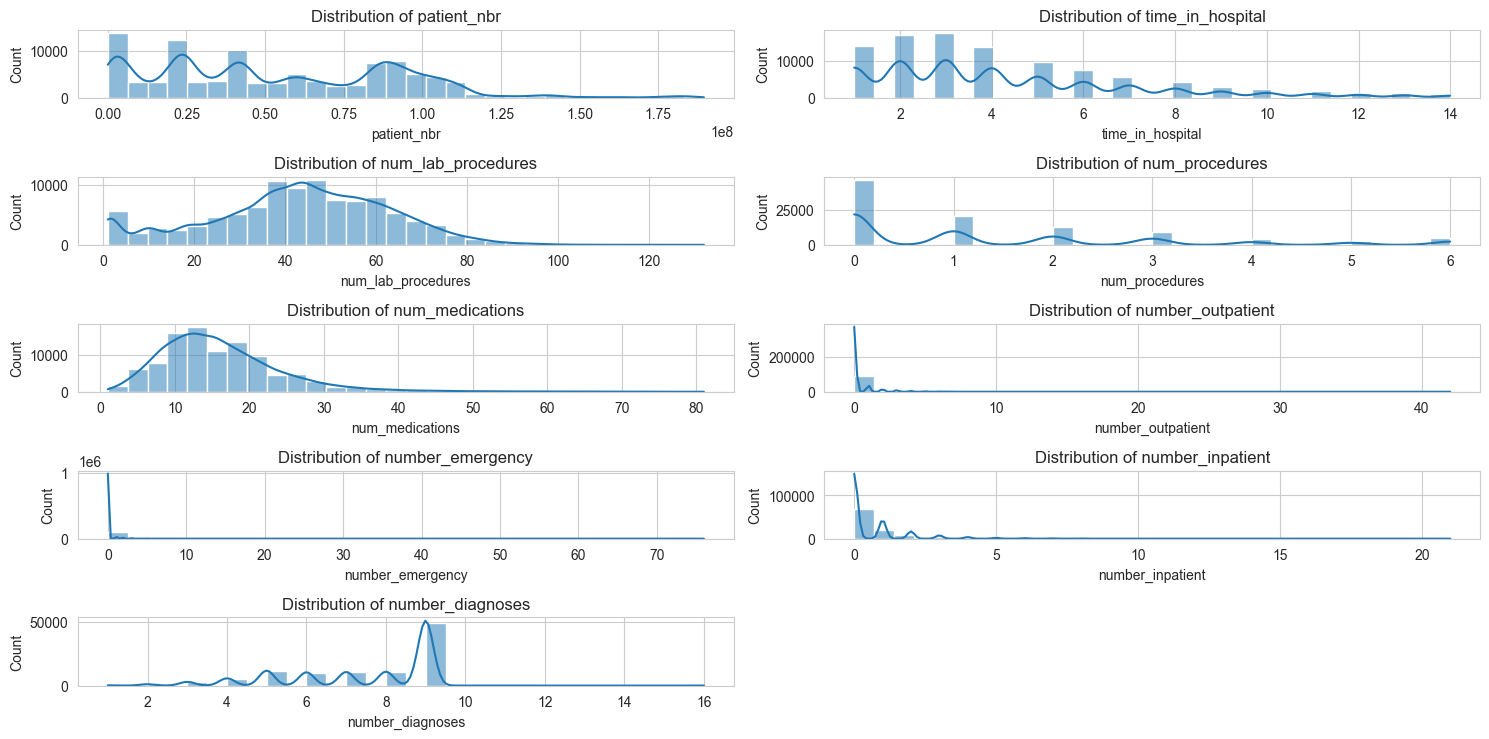

In [113]:
# Selecting numerical columns
numerical_cols = diabetic_data_placeholders_substituted.select_dtypes(include=['int64', 'float64']).columns
num_cols = 2
num_rows = (len(numerical_cols) // num_cols) + (1 if len(numerical_cols) % num_cols > 0 else 0)

# Plot distributions for numerical columns
plt.figure(figsize=(15, 10))

# Drop columns with id in the name
numerical_cols_no_id_for_plots = [col for col in numerical_cols if "id" not in col]

for i, col in enumerate(numerical_cols_no_id_for_plots):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(diabetic_data_placeholders_substituted[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


In [14]:
import pandas as pd

# Import the CSV file as a pandas DataFrame
file_path = './output_data/replaced_placeholders_with_nan.csv'
diabetic_data = pd.read_csv(file_path, sep=',', encoding='utf-8')

# Display the first few rows of the DataFrame to verify the import
print(diabetic_data.head())

C:\Users\Marco\AppData\Local\Temp\ipykernel_9288\427417082.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  diabetic_data = pd.read_csv(file_path, sep=',', encoding='utf-8')


   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)    NaN   
1        149190     55629189        Caucasian  Female  [10-20)    NaN   
2         64410     86047875  AfricanAmerican  Female  [20-30)    NaN   
3        500364     82442376        Caucasian    Male  [30-40)    NaN   
4         16680     42519267        Caucasian    Male  [40-50)    NaN   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
import shutil


output_dir = "plots"
os.makedirs(output_dir, exist_ok=True)
numerical_cols = diabetic_data_placeholders_substituted.select_dtypes(include=['int64', 'float64']).columns

diabetic_data_placeholders_substituted_merged_ids_mapping = diabetic_data_placeholders_substituted.drop(columns='readmitted', inplace=False)
non_numerical_cols = diabetic_data_placeholders_substituted_merged_ids_mapping.drop(columns=numerical_cols).columns

# Create a list to store plot filenames
plot_filenames = []

# Plot distributions for non-numerical columns and save them as images
for col in non_numerical_cols:
    distinct_count = diabetic_data_placeholders_substituted_merged_ids_mapping[col].nunique()
    
    plt.figure(figsize=(10, 5))
    
    if col == 'diag_3':
        plt.xticks([], [])
        
    if distinct_count > 10:
        plt.xticks([], [])
        
    plt.xticks(rotation=45, ha="right")
    sns.histplot(diabetic_data_placeholders_substituted_nolabel[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    

    plot_filename = f"{output_dir}/{col}_distribution.png"
    plt.tight_layout()
    plt.savefig(plot_filename)
    plt.close()
    

    plot_filenames.append(plot_filename)


zip_filename = "./output_data/plots_ids_mapping_description_added.zip"
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for plot_file in plot_filenames:
        zipf.write(plot_file, os.path.basename(plot_file))


shutil.rmtree(output_dir)

print(f"All plots have been saved and zipped into {zip_filename}")


All plots have been saved and zipped into ./output_data/plots_ids_mapping_description_added.zip


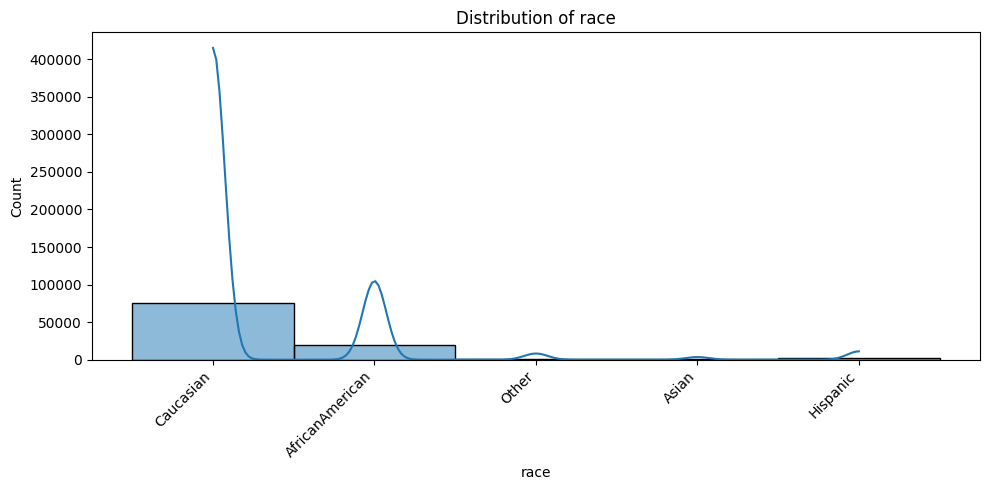

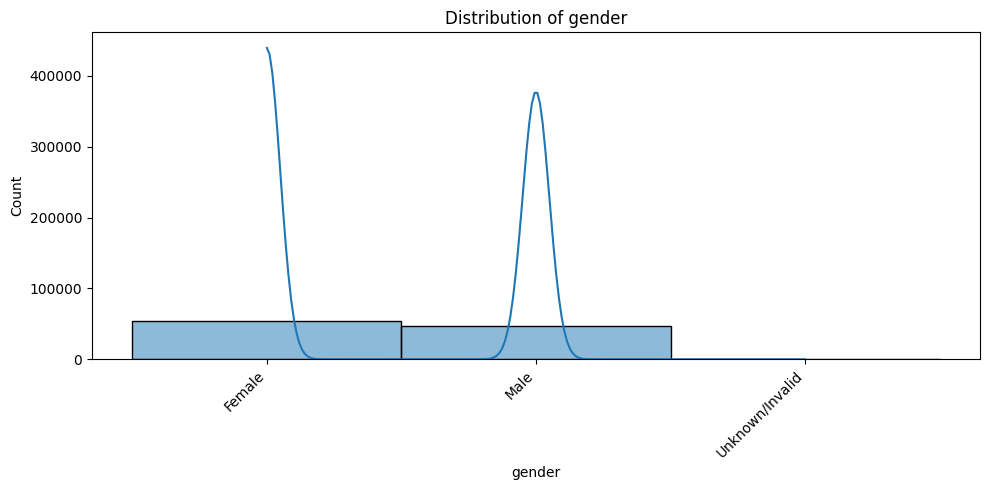

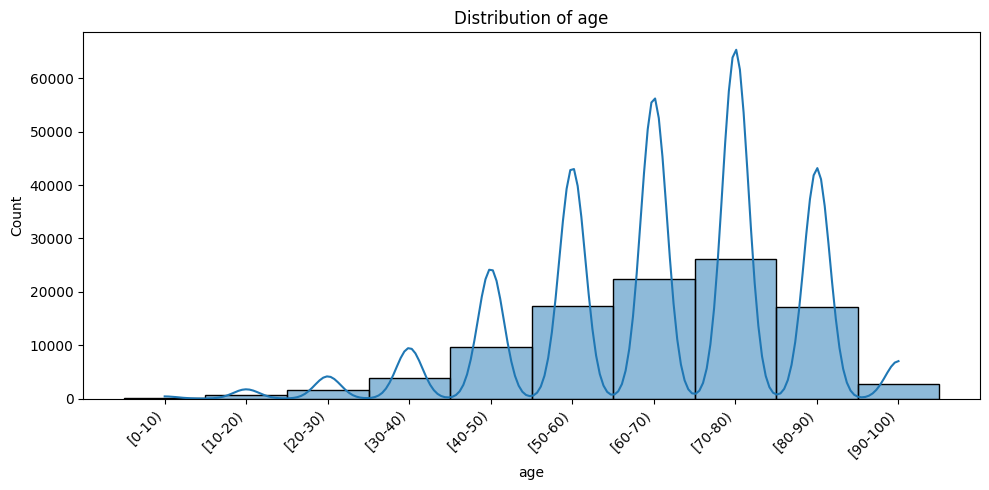

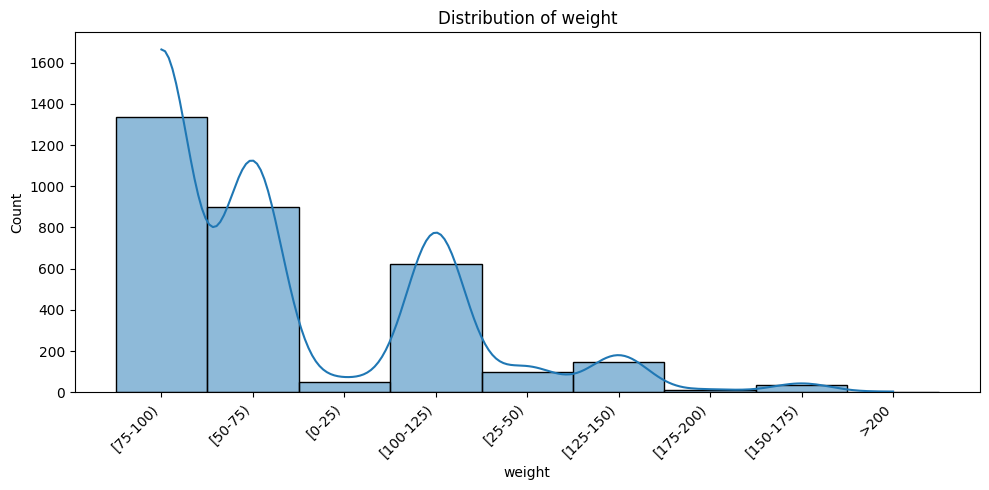

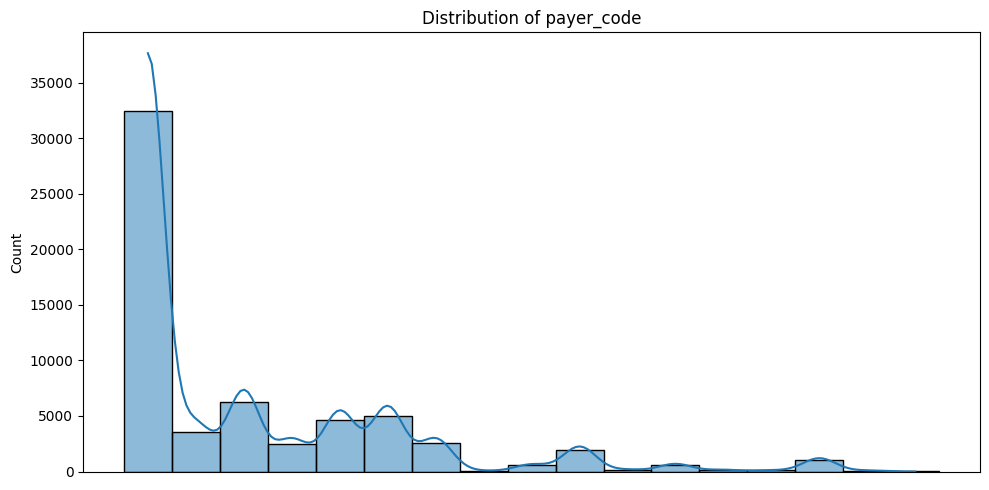

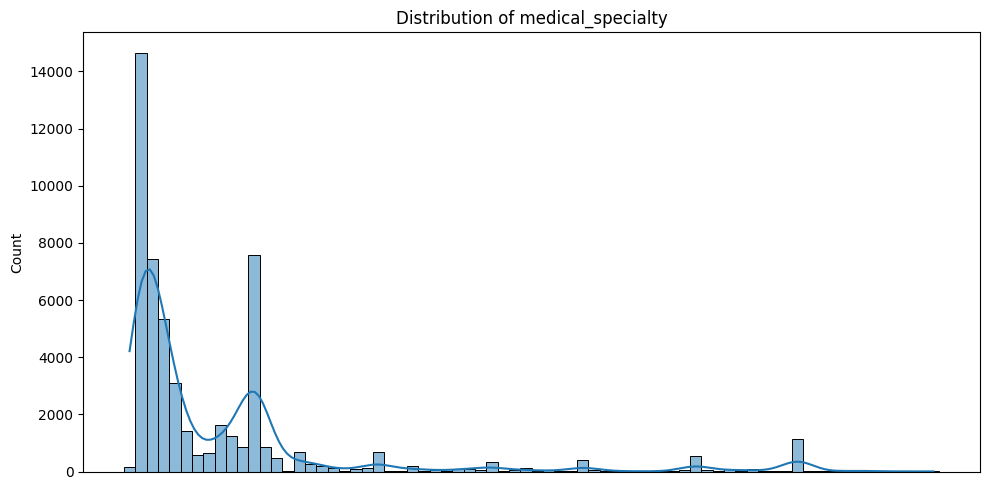

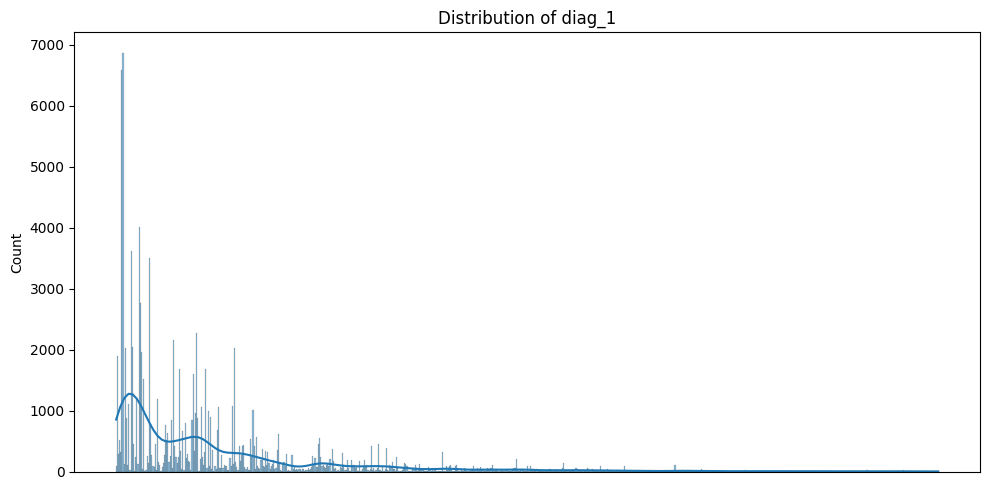

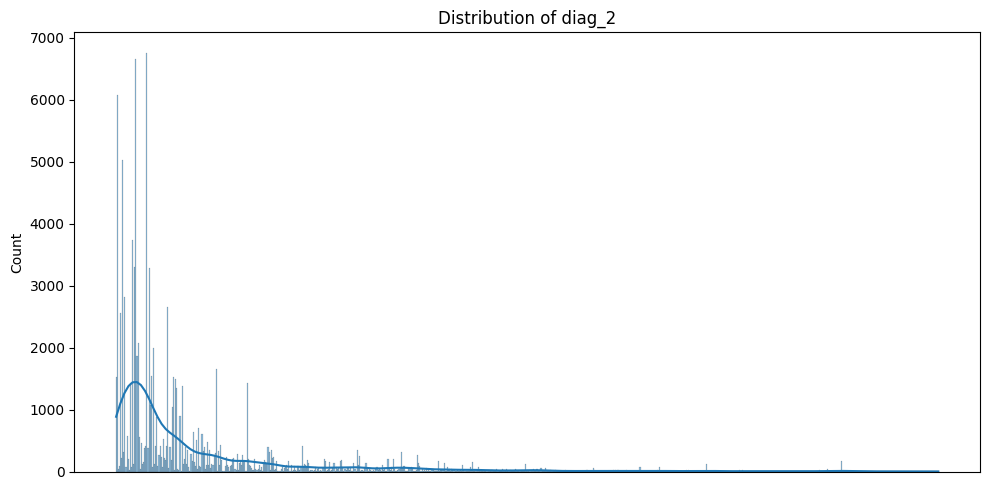

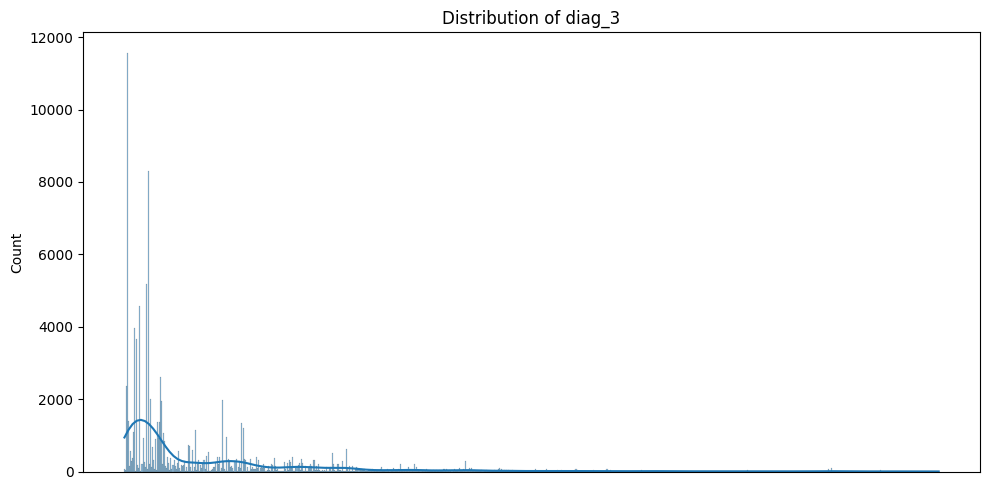

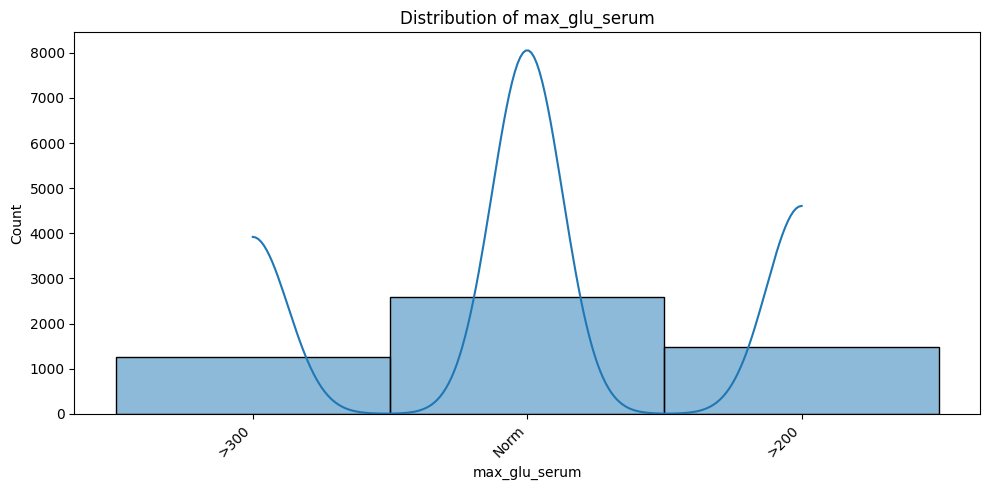

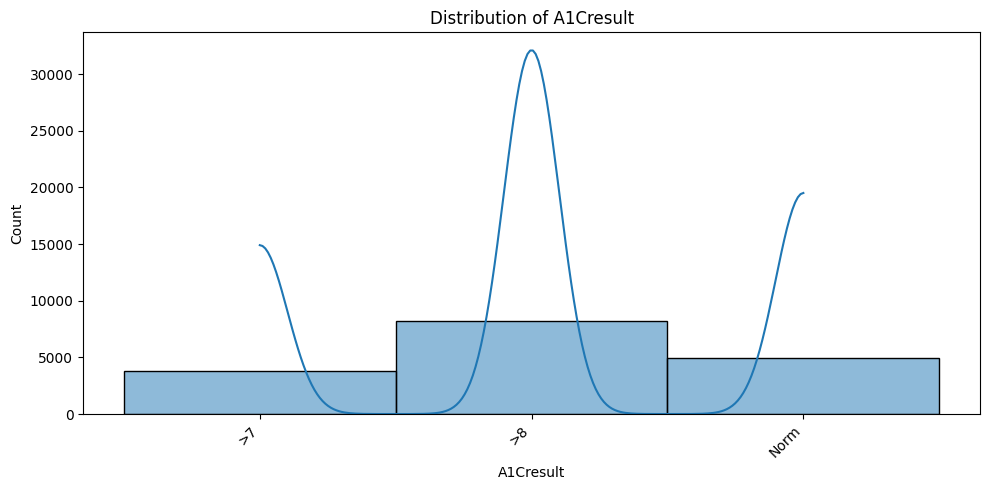

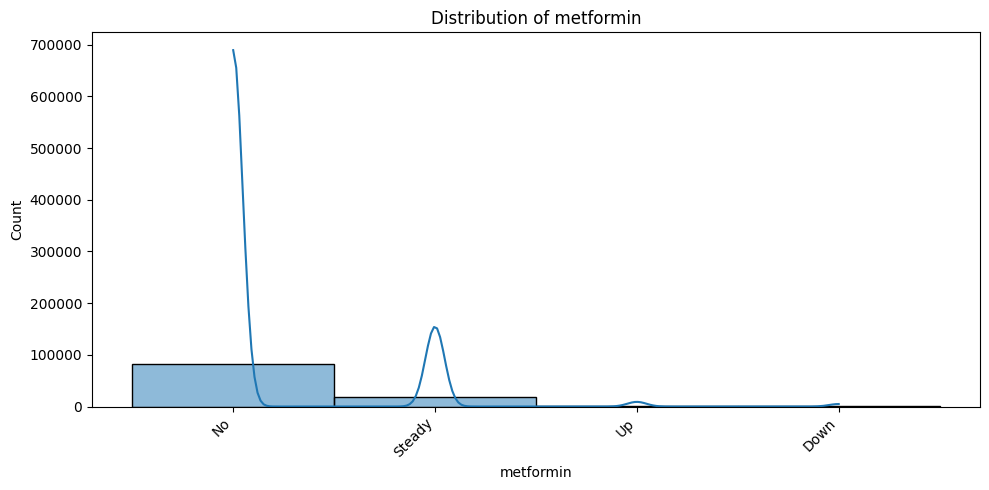

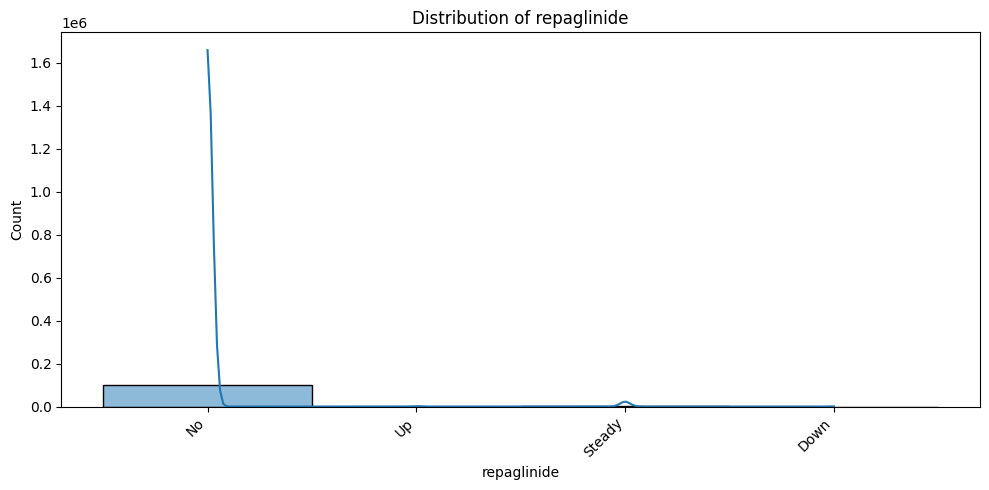

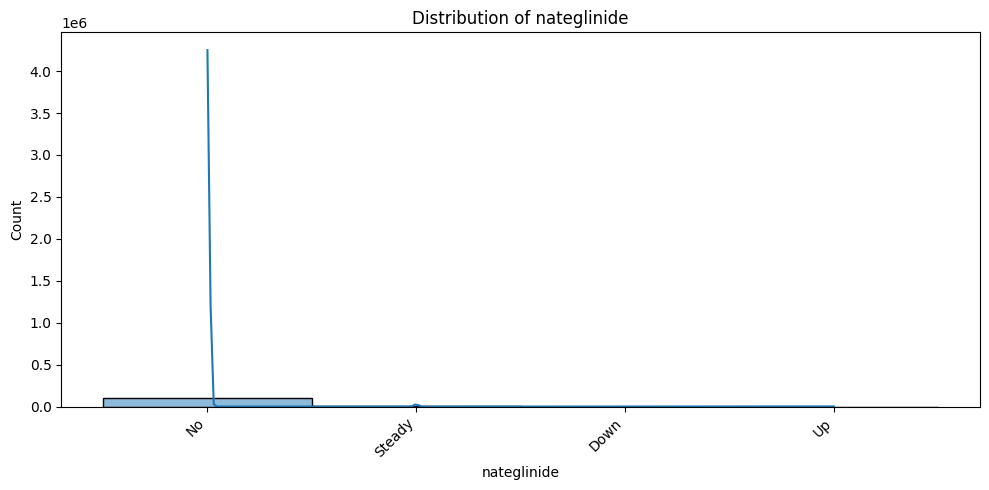

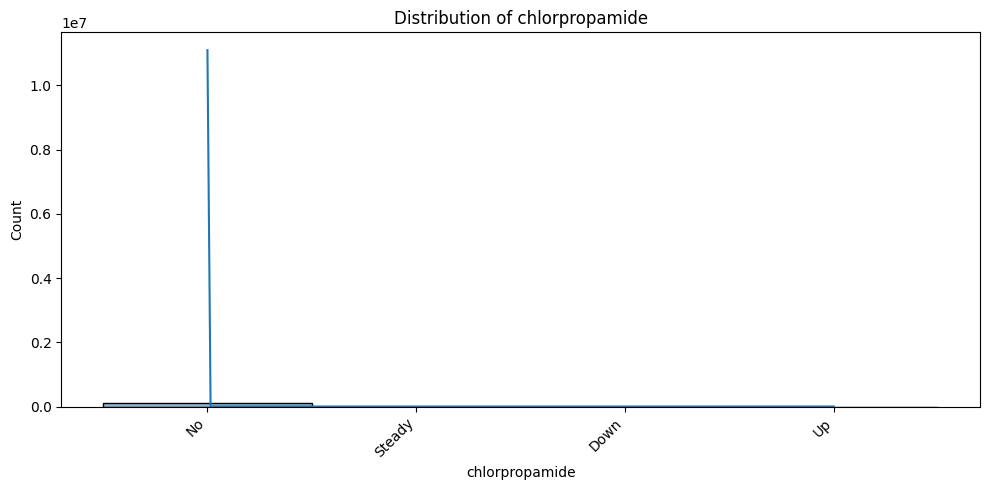

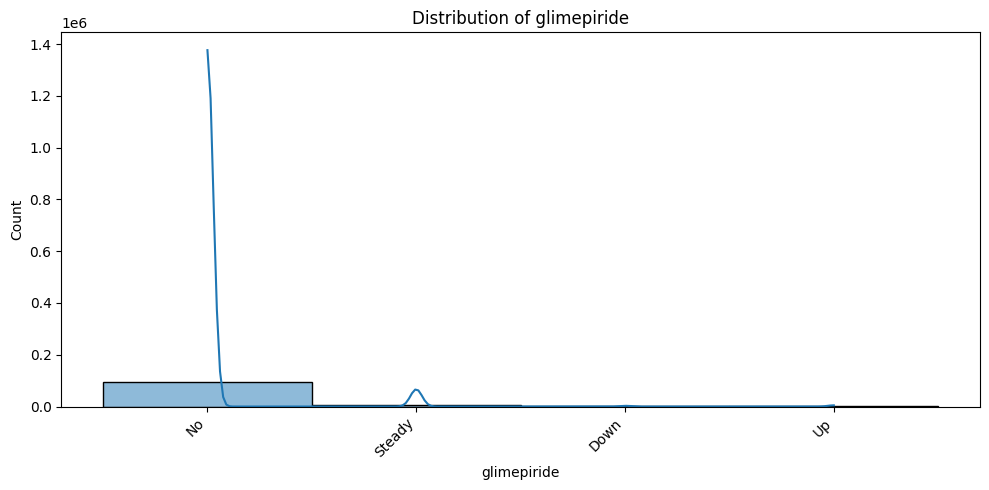

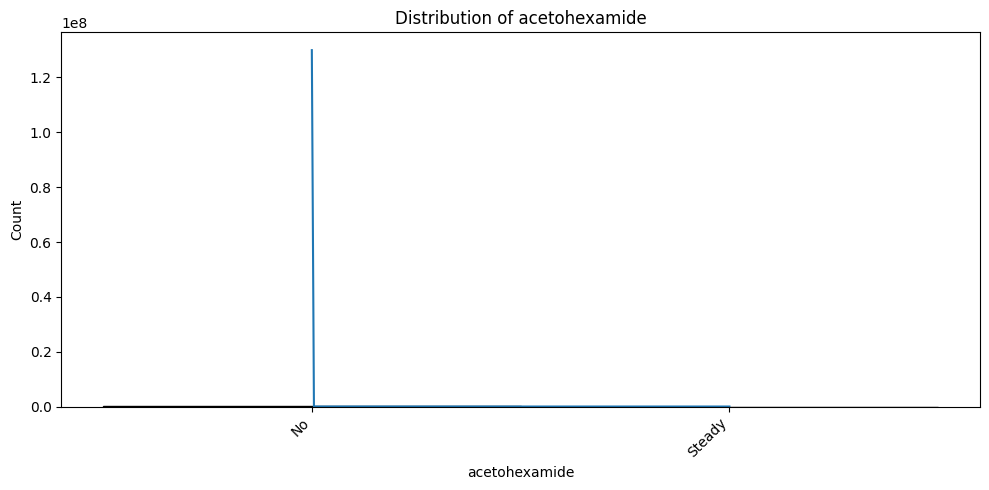

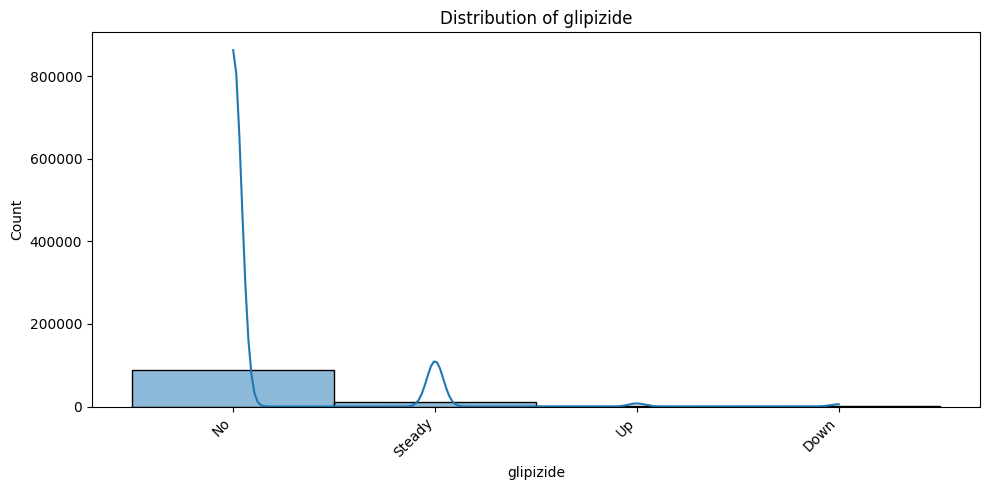

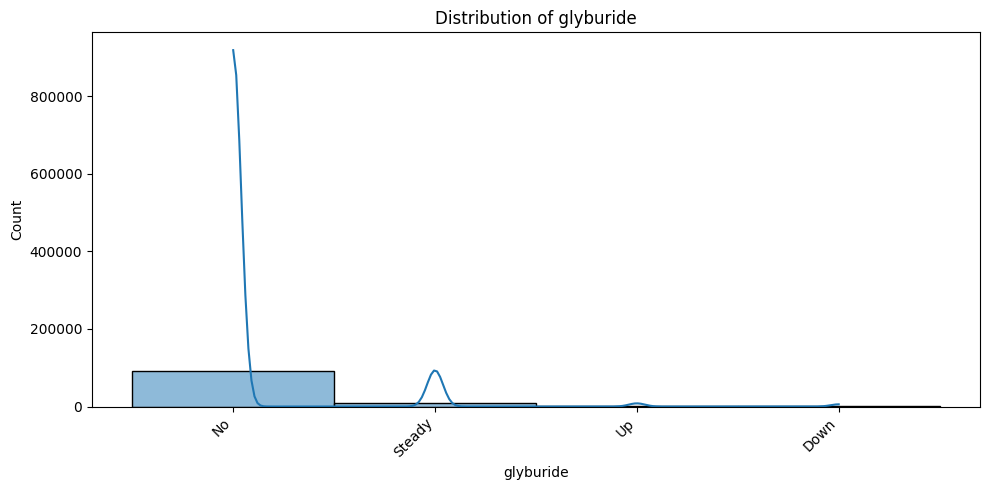

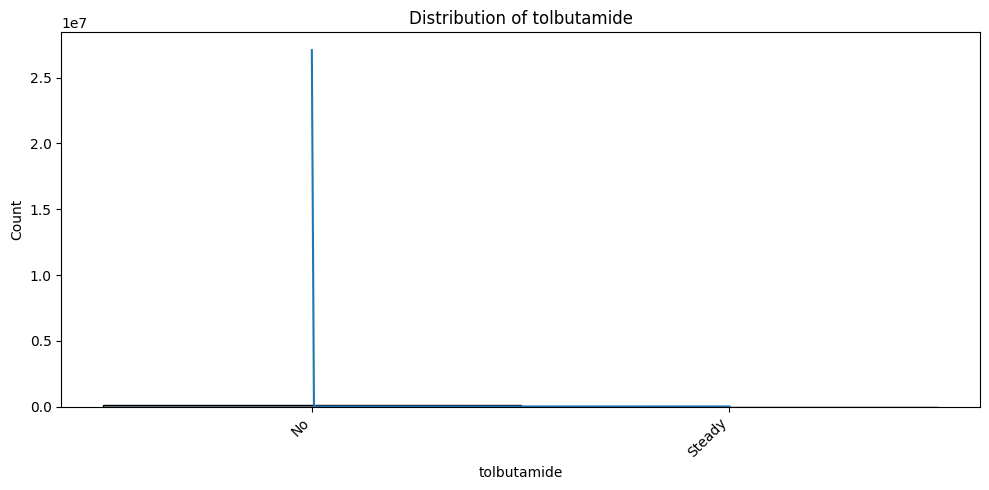

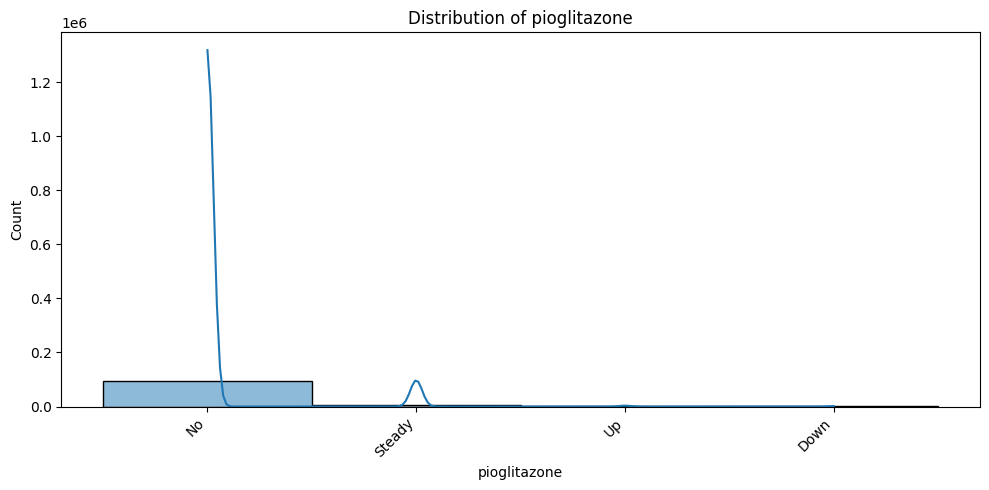

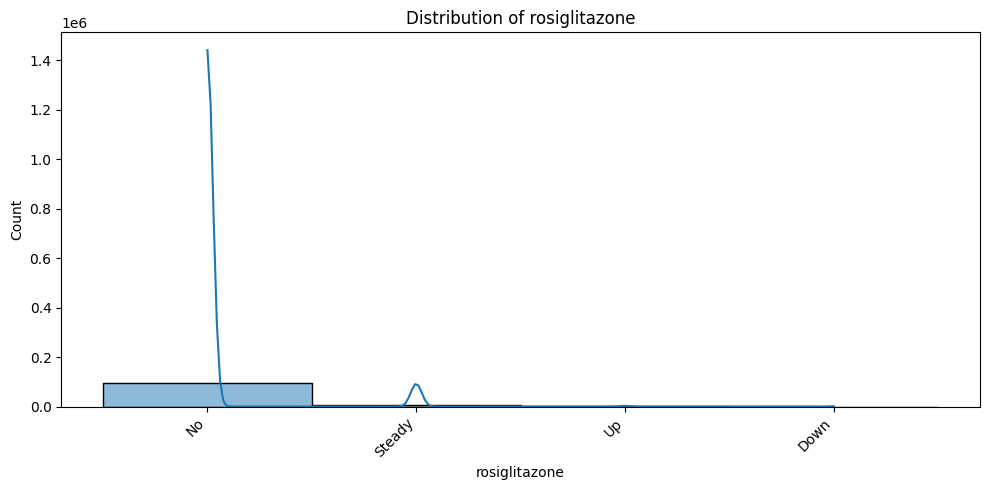

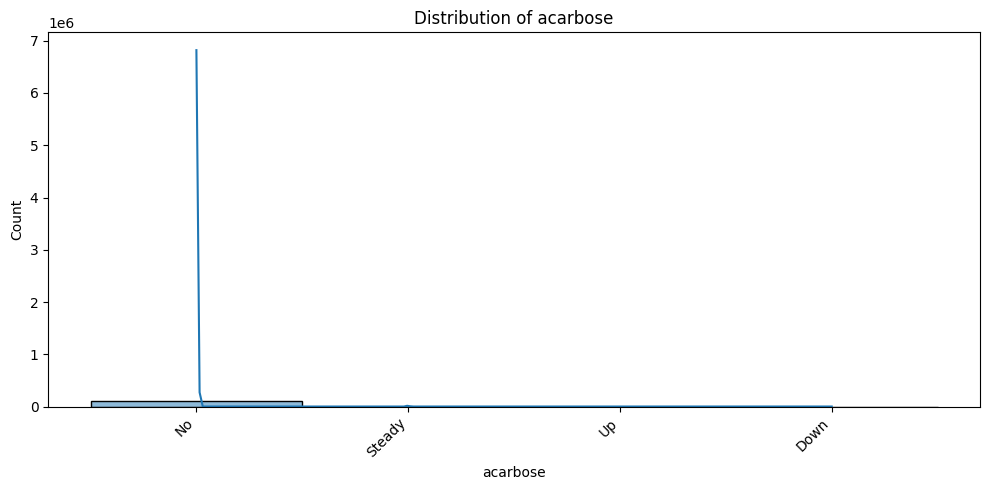

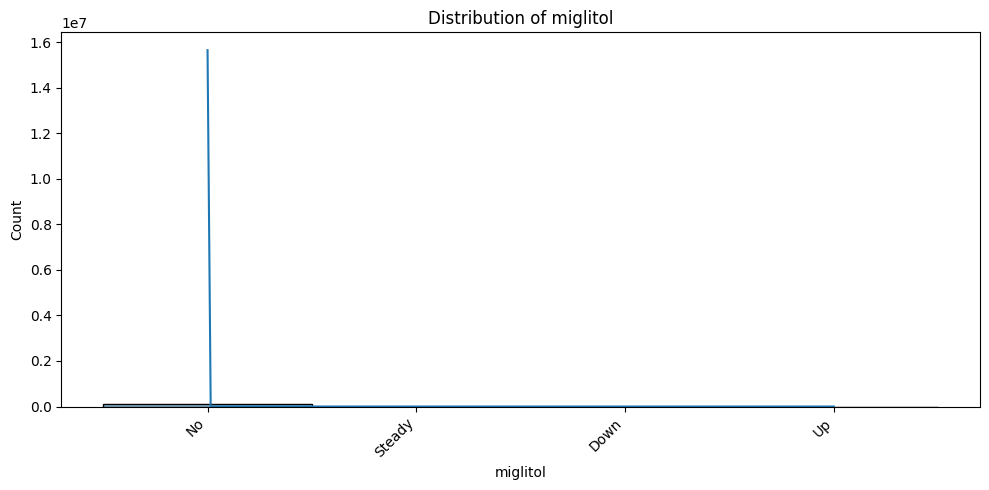

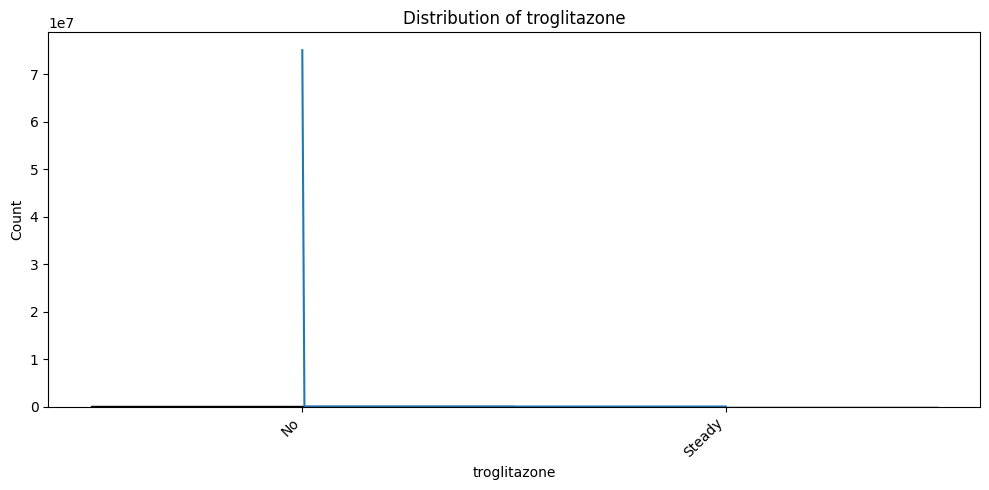

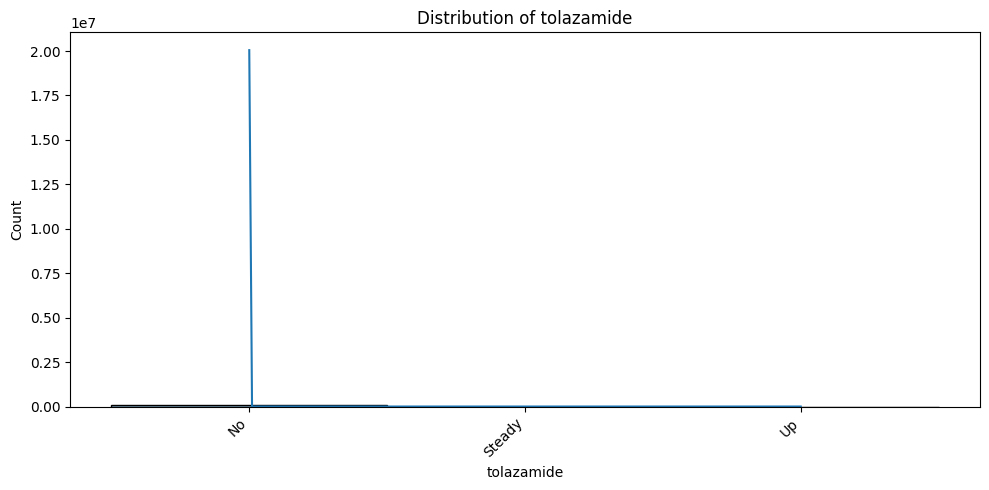

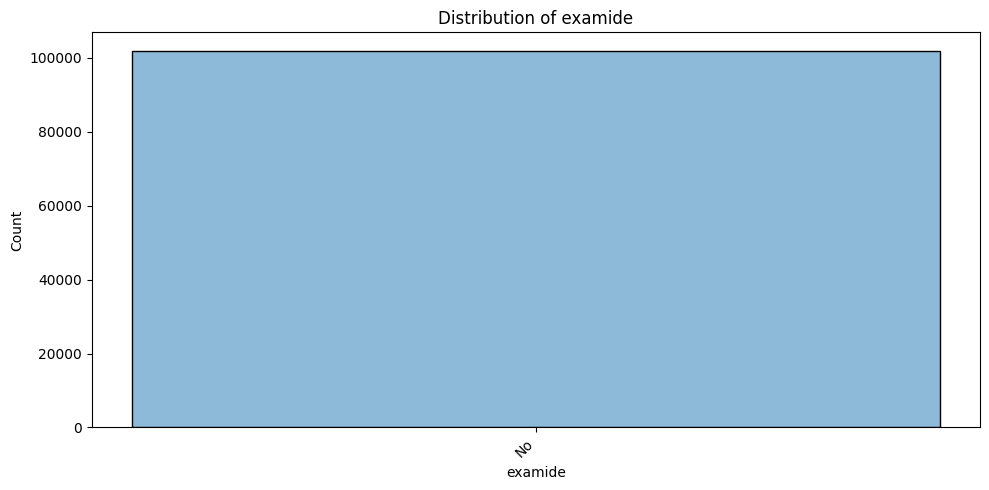

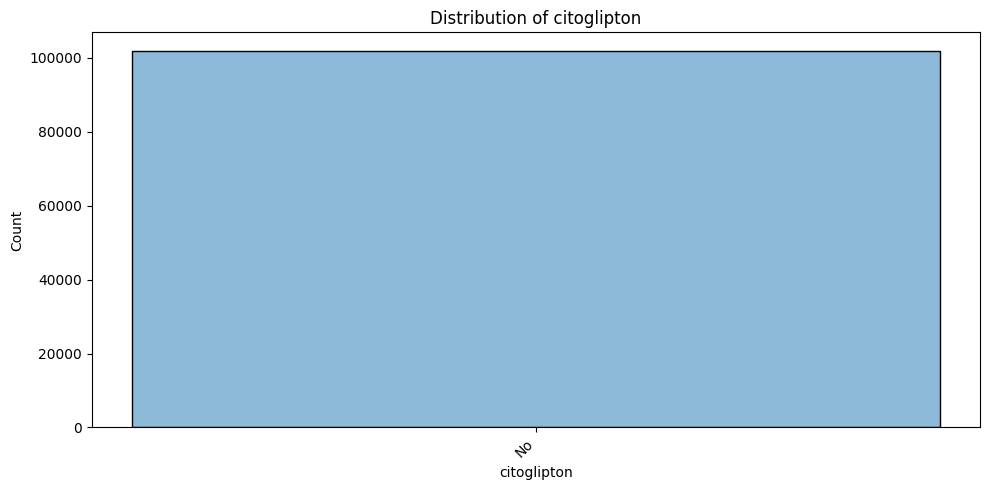

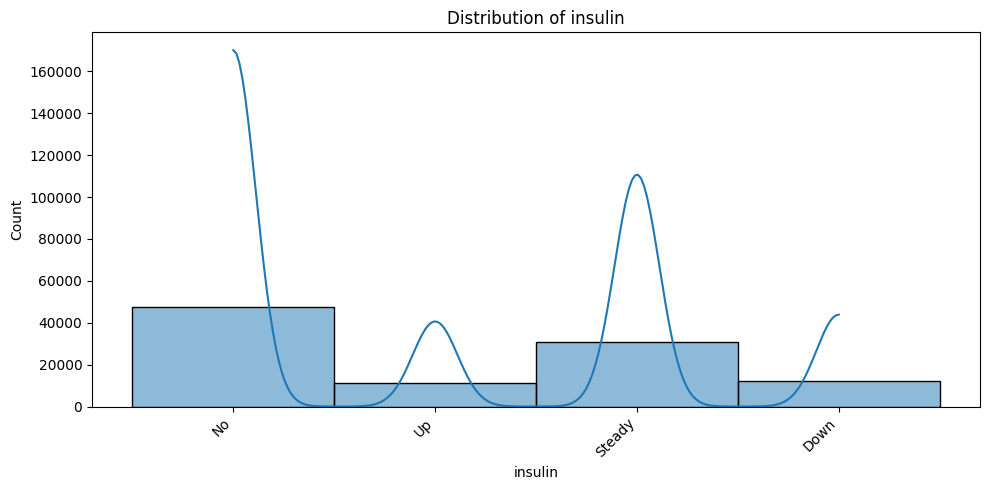

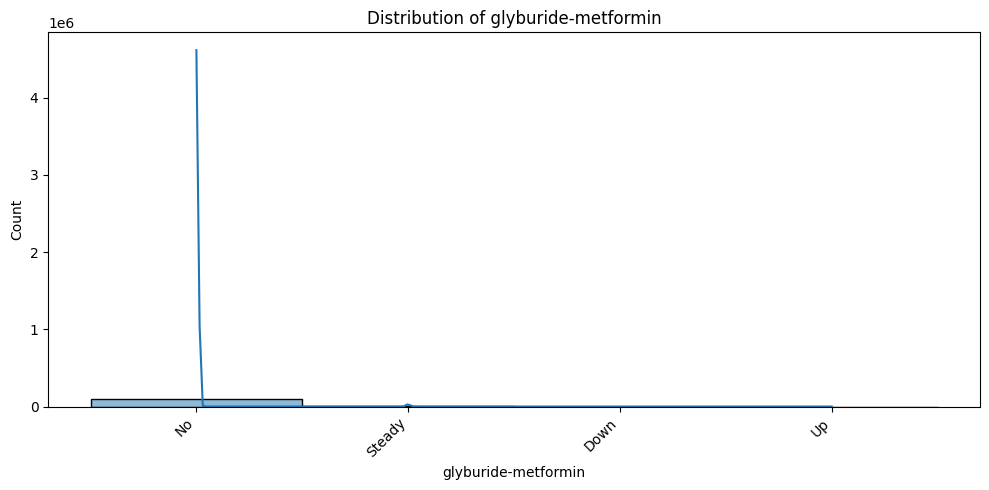

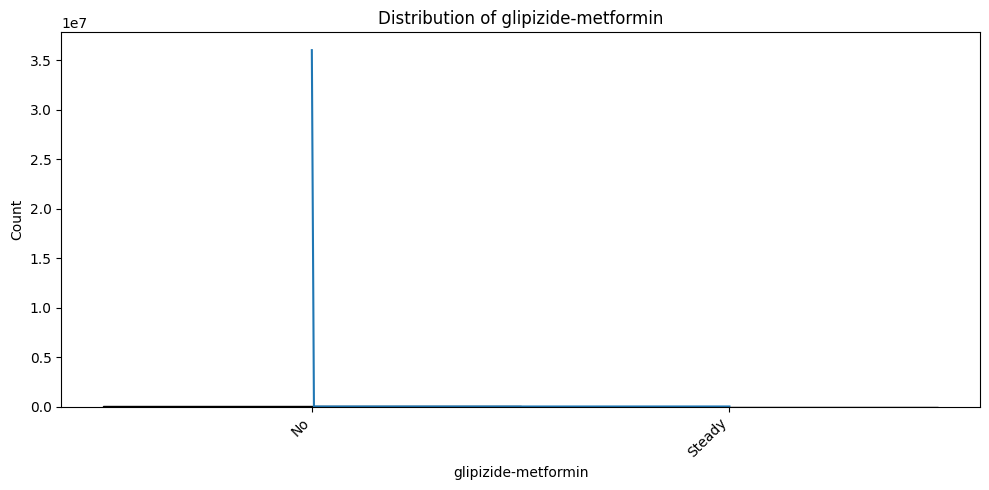

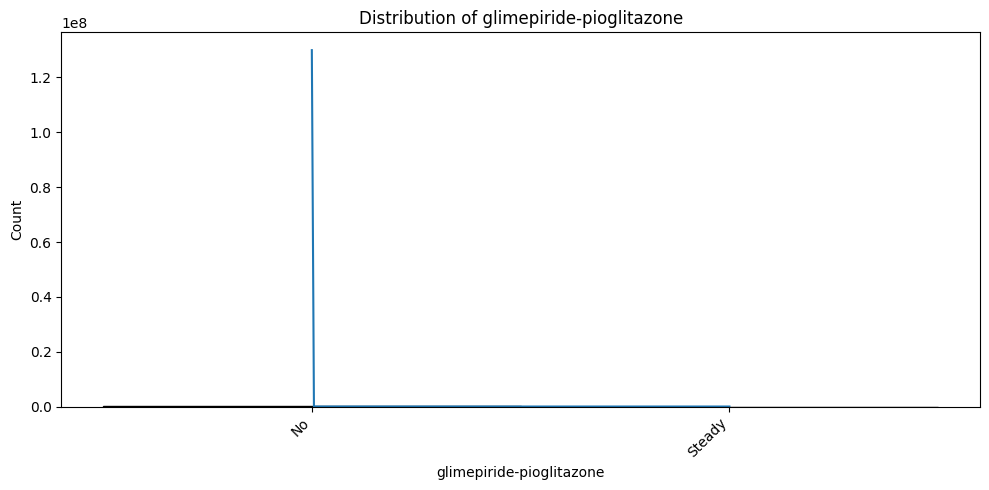

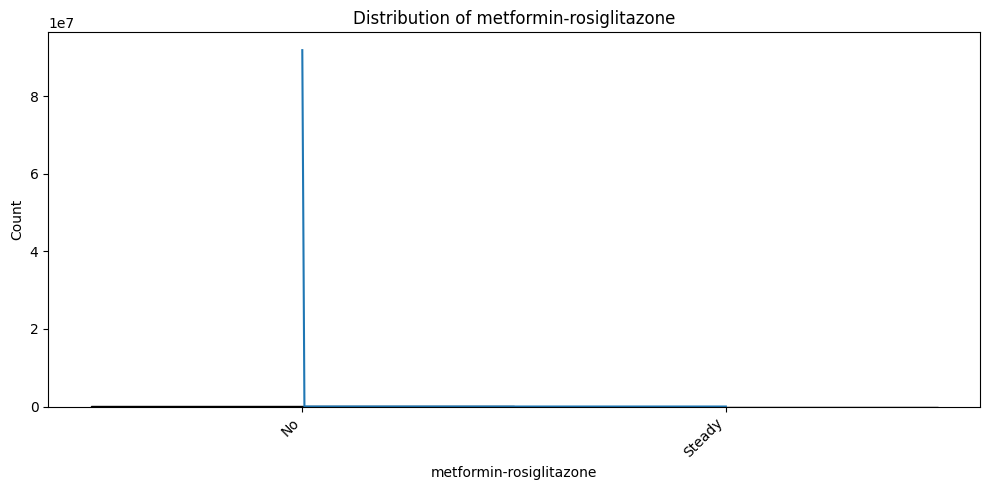

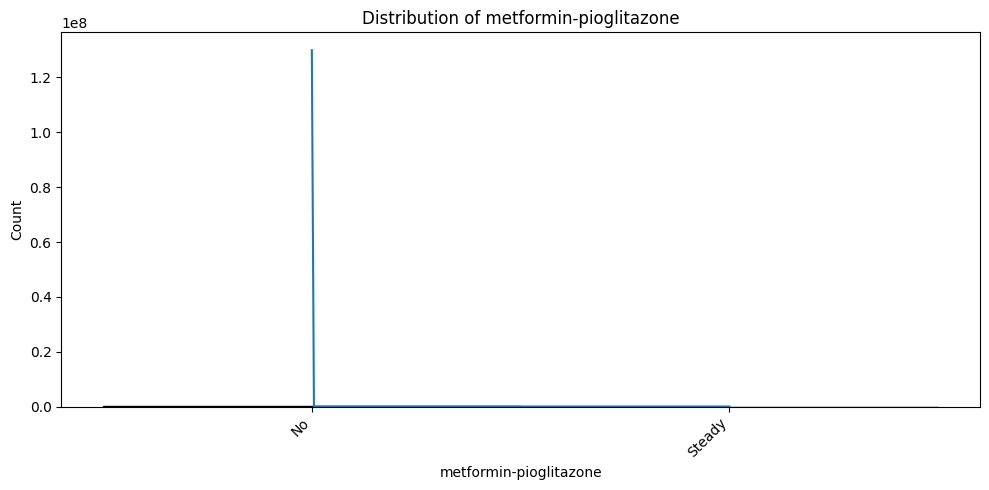

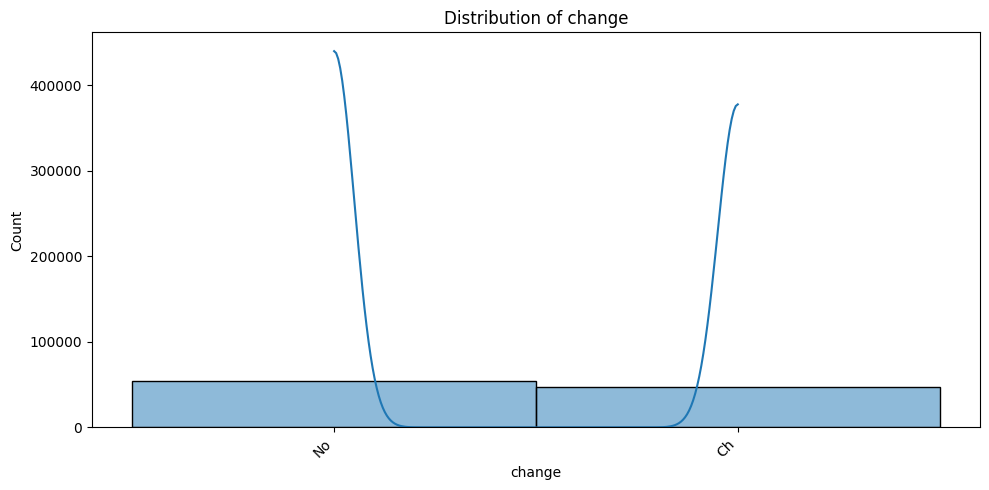

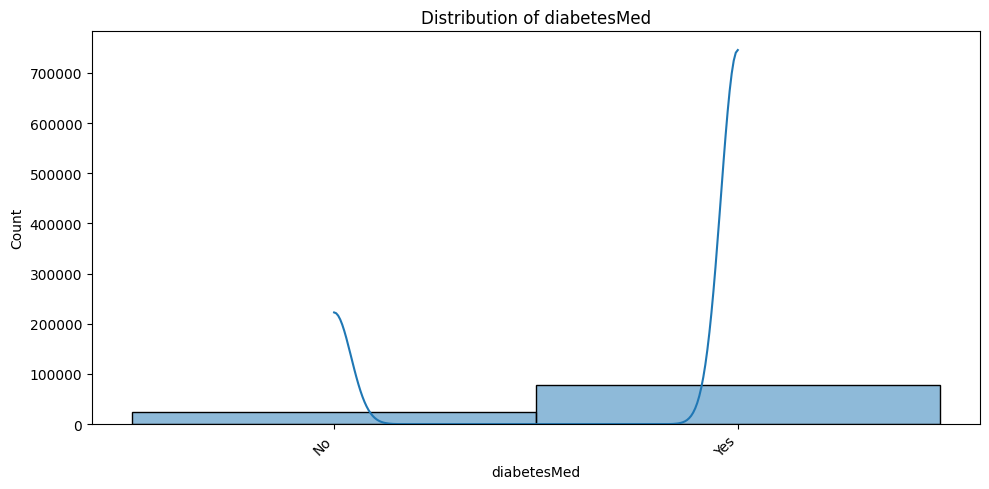

In [ ]:
# Select all columns excluding the numerical ones
diabetic_data_placeholders_substituted_nolabel = diabetic_data_placeholders_substituted.drop(columns='readmitted', inplace=False)
non_numerical_cols = diabetic_data_placeholders_substituted_nolabel.drop(columns=numerical_cols).columns

# Plot distributions for non-numerical columns separately
for col in non_numerical_cols:
    distinct_count = diabetic_data_placeholders_substituted_nolabel[col].nunique()
    
    # Create a new figure for each column
    plt.figure(figsize=(10, 5))
    
    if col == 'diag_3':
        plt.xticks([], [])  # Hide x-axis labels for diag_3 if needed
        
    if distinct_count > 10:  # Threshold for high-cardinality categories
        plt.xticks([], [])  # Hide x-axis labels for high-cardinality categories
        
    plt.xticks(rotation=45, ha="right")
    sns.histplot(diabetic_data_placeholders_substituted_nolabel[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


### Check correlation

We can plot a matrix showing the correlation of all features with each other.

In [7]:
import pandas as pd

# Import the CSV file as a pandas DataFrame
file_path = './output_data/diabetic_data_placeholders_substituted_merged_ids_mapping.csv'
diabetic_data_placeholders_substituted_merged_ids_mapping = pd.read_csv(file_path, sep=',', encoding='utf-8')

# Display the first few rows of the DataFrame to verify the import
diabetic_data_placeholders_substituted_merged_ids_mapping.head()

C:\Users\Marco\AppData\Local\Temp\ipykernel_5532\42638331.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  diabetic_data_placeholders_substituted_merged_ids_mapping = pd.read_csv(file_path, sep=',', encoding='utf-8')


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type_id_description,discharge_disposition_id_description,admission_source_id_description
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,NaN,Not Mapped,Physician Referral
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Emergency,Discharged to home,Emergency Room
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Emergency,Discharged to home,Emergency Room
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room


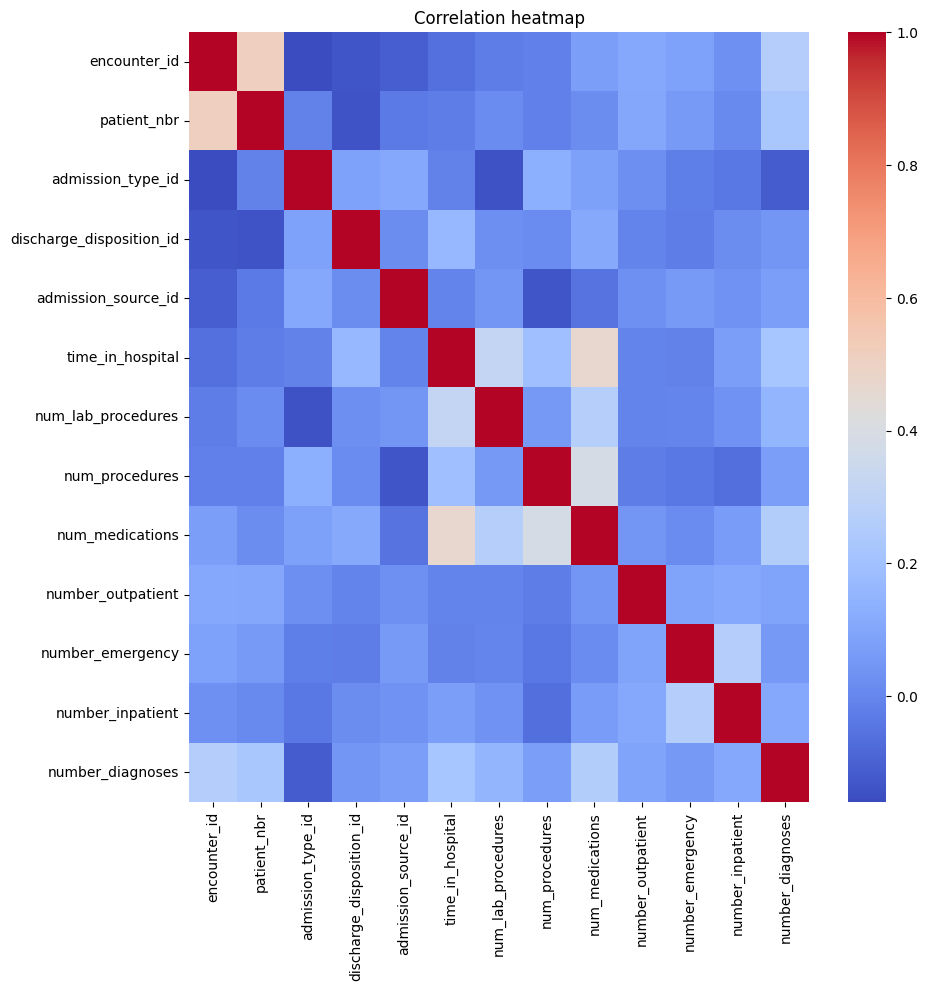

Features with correlation greater than 0.8 :



In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

# Drop non-numeric columns
non_numerical_cols = diabetic_data_placeholders_substituted_merged_ids_mapping.select_dtypes(exclude=['int64', 'float64']).columns
df = diabetic_data_placeholders_substituted_nolabel.drop(columns=non_numerical_cols, inplace=False)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation heatmap')

plt.show()


# Set a threshold for correlation
threshold = 0.8

# Find pairs of features that have a correlation above the threshold
high_corr = []

# Loop through the upper triangle of the matrix to avoid duplicate pairs
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Print the results
print("Features with correlation greater than", threshold, ":\n")
for feature1, feature2, corr_value in high_corr:
    print(f"{feature1} and {feature2}: {corr_value:.2f}")

In [10]:
import pandas as pd

diabetic_data_placeholders_substituted_merged_ids_mapping = pd.read_csv("./output_data/diabetic_data_placeholders_substituted_merged_ids_mapping.csv")

C:\Users\Marco\AppData\Local\Temp\ipykernel_5532\2788162078.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  diabetic_data_placeholders_substituted_merged_ids_mapping = pd.read_csv("./output_data/diabetic_data_placeholders_substituted_merged_ids_mapping.csv")


In [12]:
diabetic_data_placeholders_substituted_merged_ids_mapping.head()

# Check distinct values of 'readmitted' column
print(diabetic_data_placeholders_substituted_merged_ids_mapping['readmitted'].value_counts())

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64


In [13]:
# Create a new column simplifying the classification in order to plot labels distribution
diabetic_data_placeholders_substituted_merged_ids_mapping['readmitted_yes_no'] = diabetic_data_placeholders_substituted_merged_ids_mapping['readmitted'].apply(
    lambda x: 'Readmitted' if x in ['<30', '>30'] else 'Not Readmitted'
)

In [14]:
diabetic_data_placeholders_substituted_merged_ids_mapping.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type_id_description,discharge_disposition_id_description,admission_source_id_description,readmitted_yes_no
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,NaN,Not Mapped,Physician Referral,Not Readmitted
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Emergency,Discharged to home,Emergency Room,Readmitted
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Emergency,Discharged to home,Emergency Room,Not Readmitted
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room,Not Readmitted
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room,Not Readmitted


In [17]:
# Save the updated DataFrame to a new CSV file
diabetic_data_placeholders_substituted_merged_ids_mapping.to_csv('./output_data/diabetic_data_placeholders_substituted_merged_ids_mapping.csv', sep=',', index=False, encoding='utf-8')

In [18]:
# Print the first few rows of the new DataFrame
display(diabetic_data_placeholders_substituted_merged_ids_mapping.head())

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type_id_description,discharge_disposition_id_description,admission_source_id_description,readmitted_yes_no
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,NaN,Not Mapped,Physician Referral,Not Readmitted
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Emergency,Discharged to home,Emergency Room,Readmitted
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Emergency,Discharged to home,Emergency Room,Not Readmitted
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room,Not Readmitted
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room,Not Readmitted


Class Distribution:
readmitted_yes_no
Not Readmitted    54864
Readmitted        46902
Name: count, dtype: int64


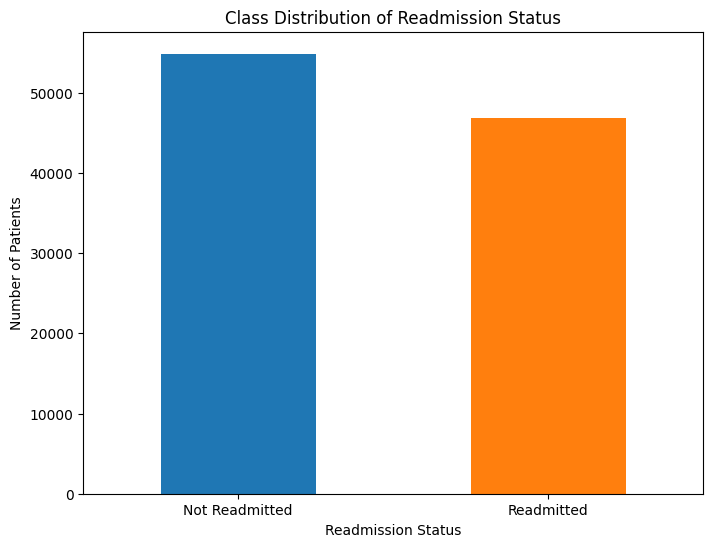

In [19]:
import matplotlib.pyplot as plt

# Calculate class distribution
class_distribution = diabetic_data_placeholders_substituted_merged_ids_mapping['readmitted_yes_no'].value_counts()

print("Class Distribution:")
print(class_distribution)

# Plot the class distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Class Distribution of Readmission Status')
plt.xlabel('Readmission Status')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def outliers(df):

    filtered_cols = [col for col in numerical_cols if col not in ['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id']]
    
    num_cols = 1
    num_rows = len(filtered_cols)

    # Boxplot for numerical columns
    plt.figure(figsize=(10, 5 * num_rows))
    sns.set_style("whitegrid")
    for i, col in enumerate(filtered_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.boxplot(y=col, data=df)
        plt.title(f"Boxplot of {col}")
        plt.ylabel('')
        plt.xticks(rotation=45, fontsize=10)

    plt.tight_layout()
    plt.show()

In [14]:
# plot KDE plot for numerical columns

import seaborn as sns
import matplotlib.pyplot as plt

def kde_plot(df):

    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

    filtered_cols = [col for col in numerical_cols if col not in ['encounter_id', 'patient_nbr', 'admission_source_id', 'admission_type_id', 'discharge_disposition_id']]

    num_cols = 1
    num_rows = len(filtered_cols)

    # KDE Plot for numerical columns
    plt.figure(figsize=(10, 5 * num_rows))
    for i, col in enumerate(filtered_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.kdeplot(data=df, x=col, hue='readmitted_yes_no', common_norm=False)
        plt.title(f"KDE Plot of {col} by Readmission Status")

    plt.tight_layout()
    plt.savefig('./output_data/kde_plots_high_res.png', dpi=300)
    plt.show()


In [7]:
import pandas as pd

# Read the data
diabetic_data_placeholders_substituted_merged_ids_mapping = pd.read_csv('./output_data/diabetic_data_placeholders_substituted_merged_ids_mapping.csv')

C:\Users\Marco\AppData\Local\Temp\ipykernel_6508\562595449.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  diabetic_data_placeholders_substituted_merged_ids_mapping = pd.read_csv('./output_data/diabetic_data_placeholders_substituted_merged_ids_mapping.csv')


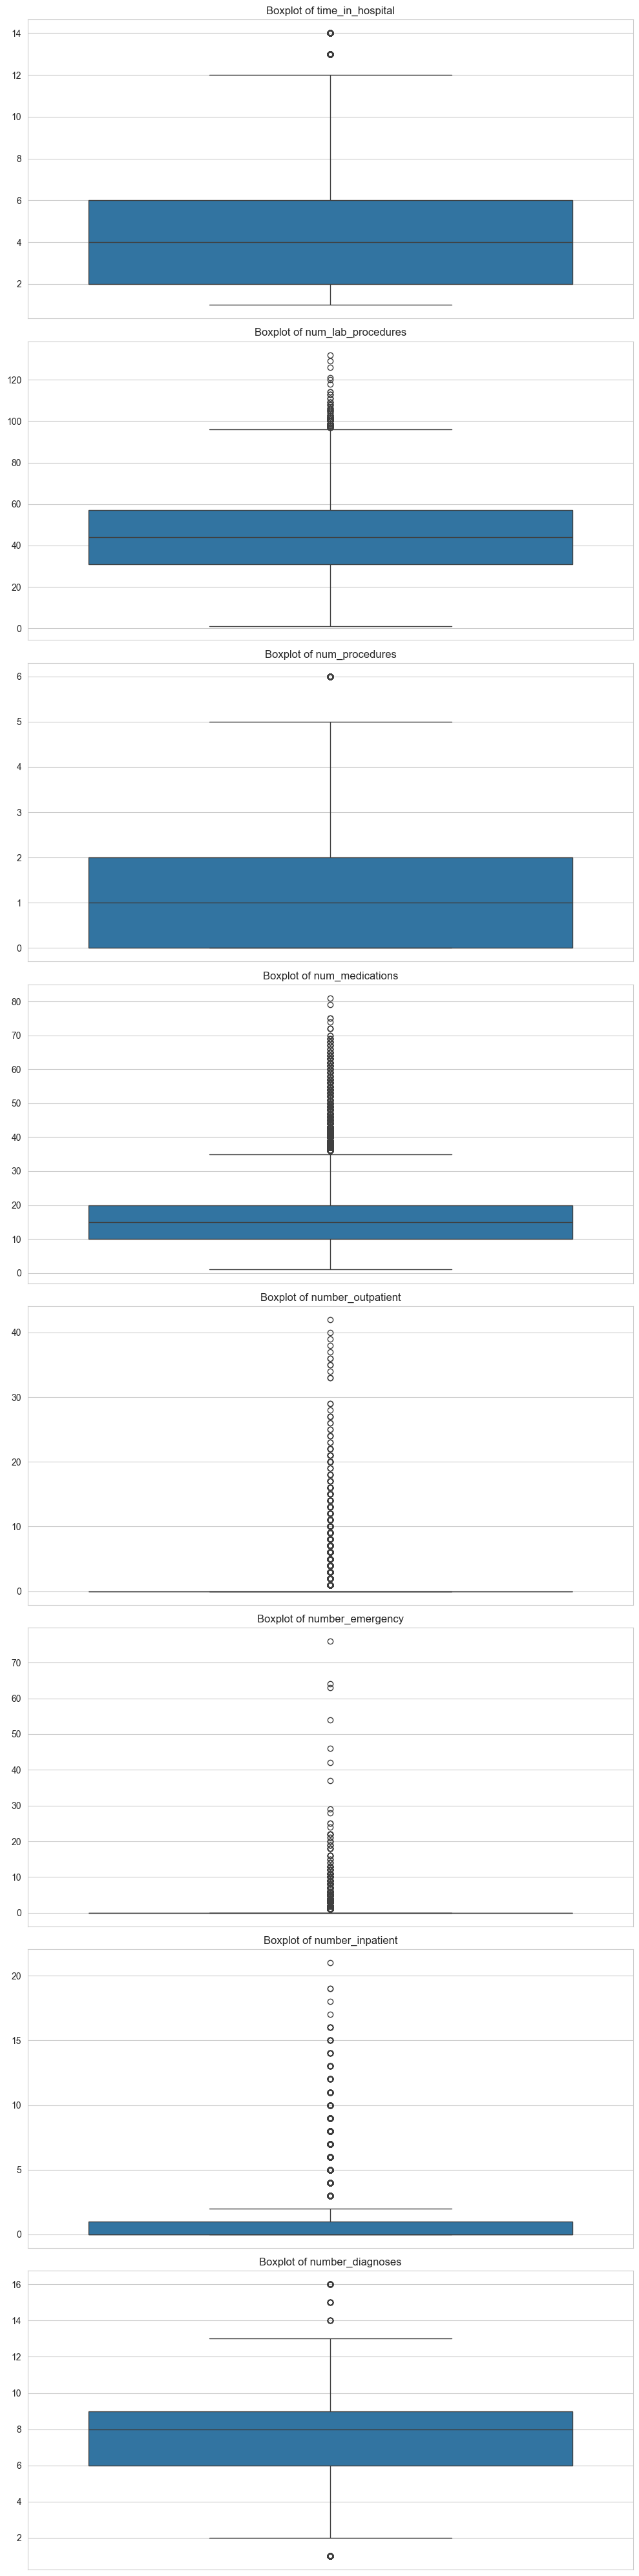

In [11]:
numerical_cols = diabetic_data_placeholders_substituted_merged_ids_mapping.select_dtypes(include=['int64', 'float64']).columns
outliers(diabetic_data_placeholders_substituted_merged_ids_mapping)

In [13]:
# Compute the 1.5 x IQR range for each numerical column
filtered_cols = [col for col in numerical_cols if col not in ['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id']]

Q1 = diabetic_data_placeholders_substituted_merged_ids_mapping[filtered_cols].quantile(0.25)
Q3 = diabetic_data_placeholders_substituted_merged_ids_mapping[filtered_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers for each numerical column
outliers = (diabetic_data_placeholders_substituted_merged_ids_mapping[filtered_cols] < lower_bound) | (diabetic_data_placeholders_substituted_merged_ids_mapping[filtered_cols] > upper_bound)


# Display the number of outliers for each numerical column
print("Number of Outliers for Each Numerical Column:")
print(outliers.sum())

# Display the percentage of outliers for each numerical column
print("\nPercentage of Outliers for Each Numerical Column:")
print(outliers.mean() * 100)

Number of Outliers for Each Numerical Column:
time_in_hospital       2252
num_lab_procedures      143
num_procedures         4954
num_medications        2557
number_outpatient     16739
number_emergency      11383
number_inpatient       7049
number_diagnoses        281
dtype: int64

Percentage of Outliers for Each Numerical Column:
time_in_hospital       2.212920
num_lab_procedures     0.140518
num_procedures         4.868031
num_medications        2.512627
number_outpatient     16.448519
number_emergency      11.185465
number_inpatient       6.926675
number_diagnoses       0.276124
dtype: float64


In [ ]:
pip install --upgrade seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: C:\Users\Marco\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
# load the data
diabetic_data_placeholders_substituted_merged_ids_mapping = pd.read_csv('./output_data/diabetic_data_placeholders_substituted_merged_ids_mapping.csv')

C:\Users\Marco\AppData\Local\Temp\ipykernel_8696\894333711.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  diabetic_data_placeholders_substituted_merged_ids_mapping = pd.read_csv('./output_data/diabetic_data_placeholders_substituted_merged_ids_mapping.csv')


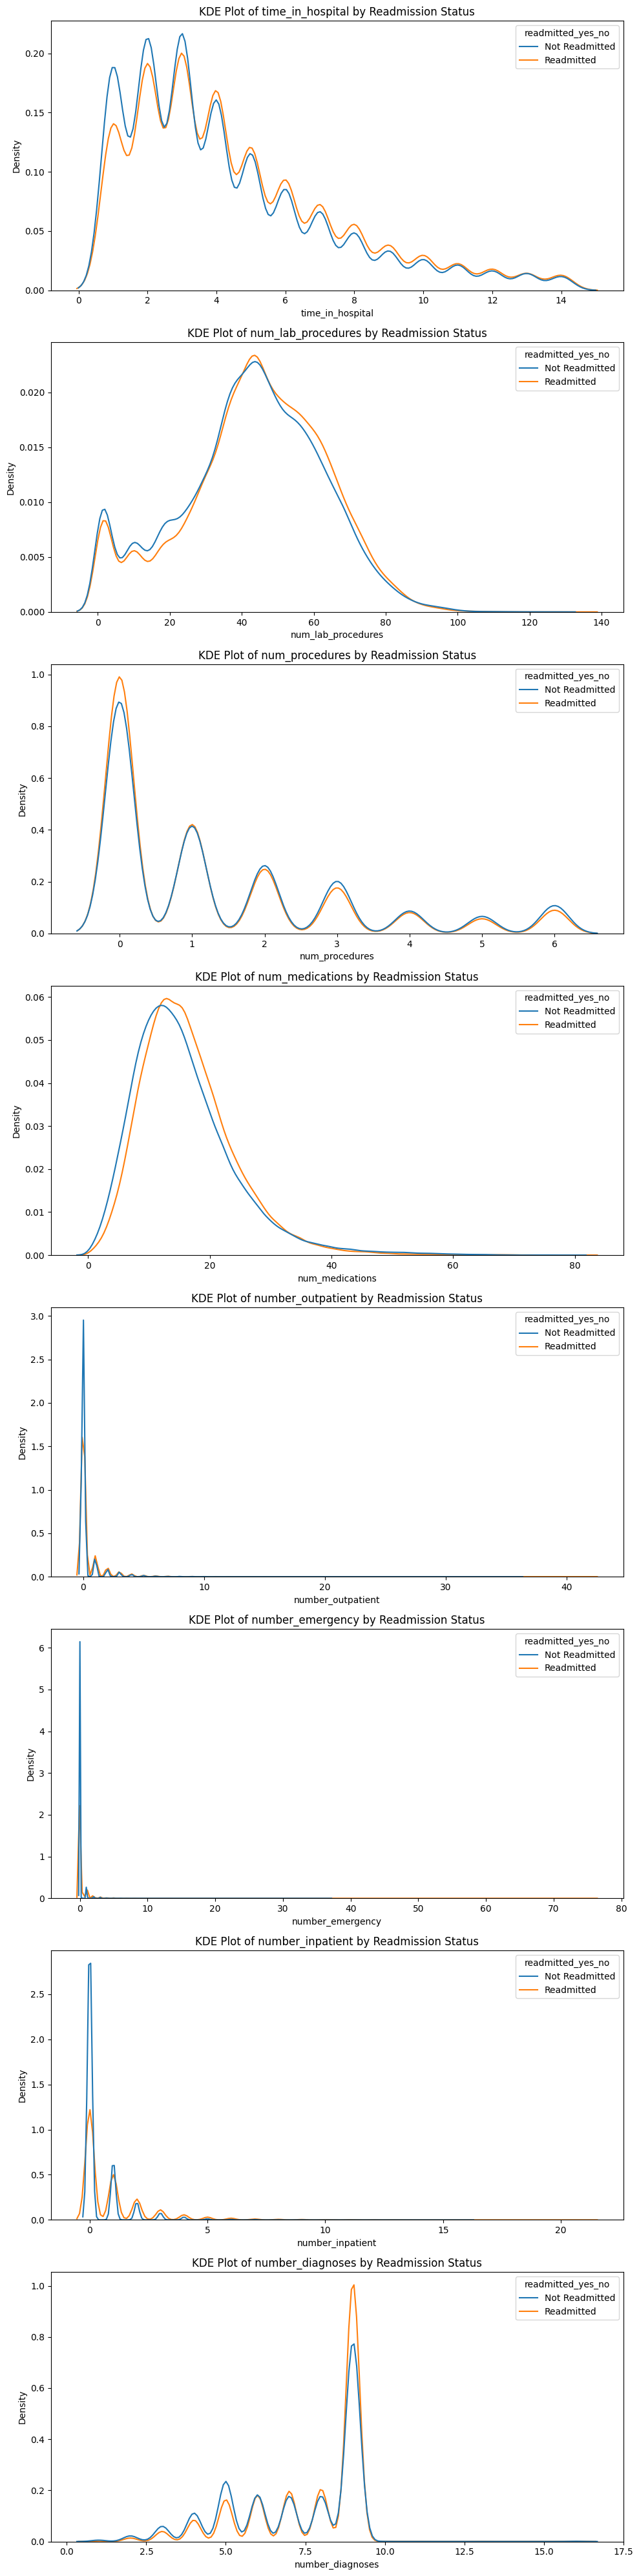

In [15]:
kde_plot(diabetic_data_placeholders_substituted_merged_ids_mapping)

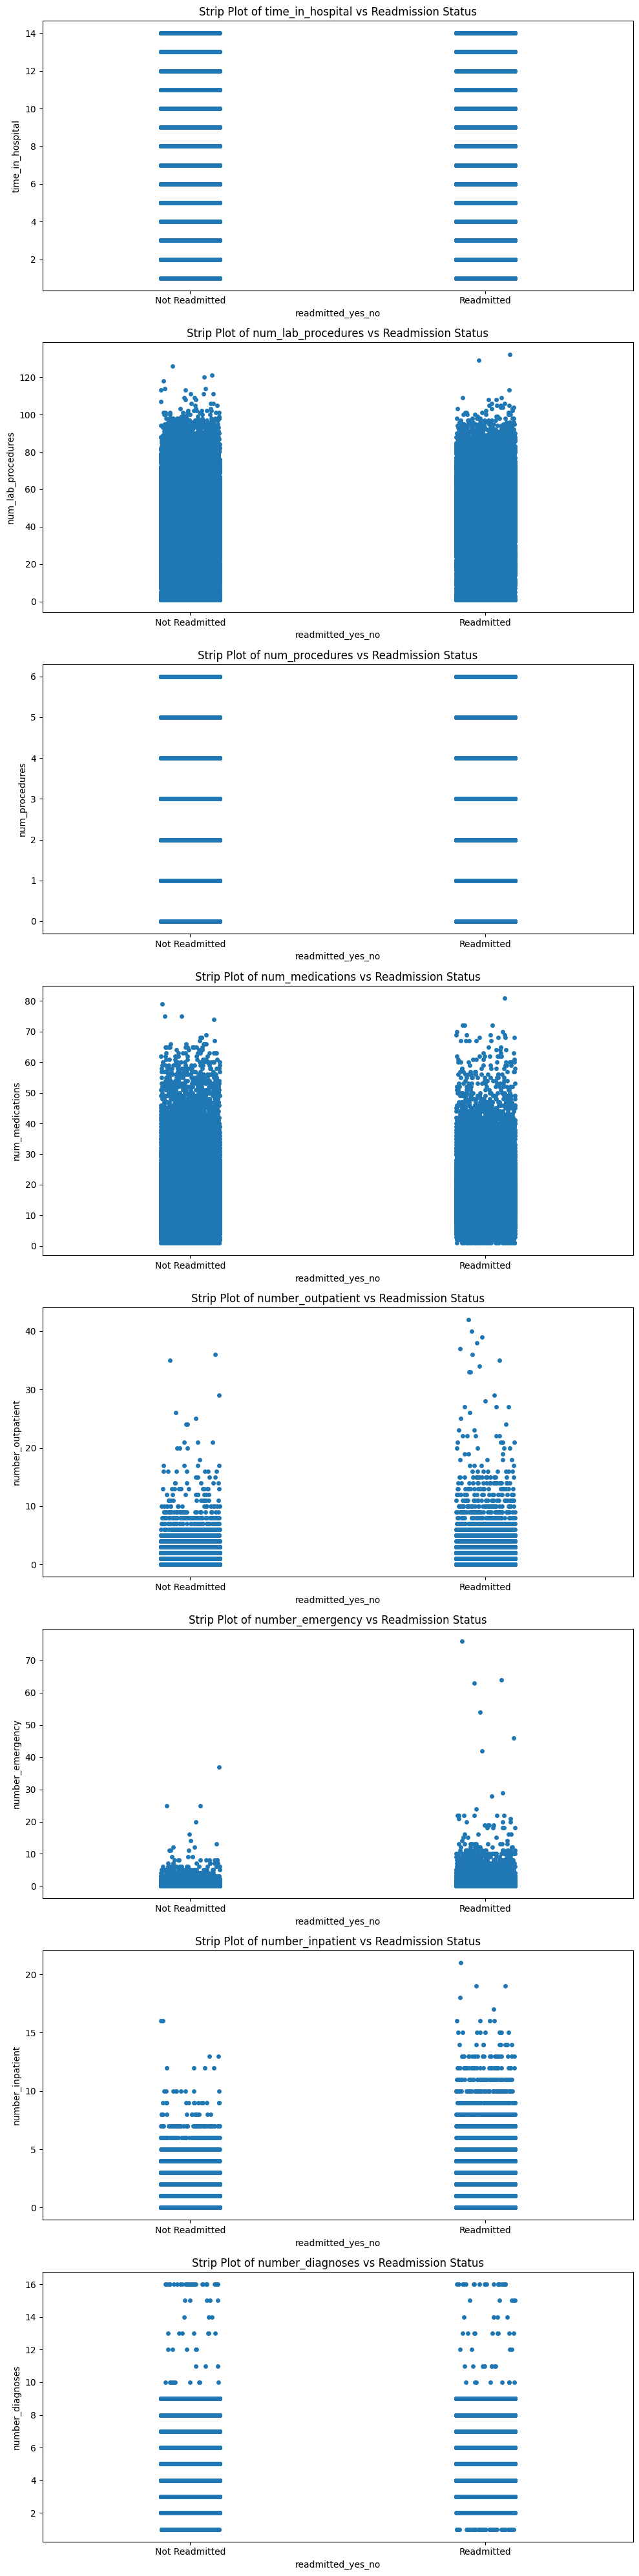

In [ ]:
# Scatter plots of features vs target variable

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def scatter_plot(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

    filtered_cols = [col for col in numerical_cols if col not in ['encounter_id', 'patient_nbr', 'admission_source_id', 'admission_type_id', 'discharge_disposition_id']]

    num_cols = 1
    num_rows = len(filtered_cols)

    # Strip Plot for numerical columns
    plt.figure(figsize=(10, 5 * num_rows))
    for i, col in enumerate(filtered_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.stripplot(data=df, x='readmitted_yes_no', y=col, jitter=True)
        plt.title(f"Strip Plot of {col} vs Readmission Status")

    plt.tight_layout()
    plt.savefig('./output_data/strippot_plots_high_res.png', dpi=300)
    plt.show()


scatter_plot(diabetic_data_placeholders_substituted_merged_ids_mapping)

---

### Task 2: Data assembling and initial pre-processing (10%)
* 2.1 Assemble a dataset consisting of features and labels (e.g. X and y). 
You can create a
balanced dataset and use a smaller subset of the data to decrease the
computation load (you can make a choice about the subset size depending on
your computational resources). Describe the procedure used for assembling the data.
(2.5%)
* 2.2 Describe which data cleaning and pre-processing steps are needed 
(e.g. dropping
features, encoding features, data imputation). Keep in mind that some pre-processing
steps need to be embedded in the cross-validation framework to avoid data leaking.
(5%)
* 2.3 Discuss which strategy could be used to better encode the diagnoses features 
(diag_1, diag_2, diag_3). (2.5%)

---

In [1]:
import pandas as pd

# Read the data
diabetic_data_placeholders_substituted_merged_ids_mapping = pd.read_csv('./output_data/diabetic_data_placeholders_substituted_merged_ids_mapping.csv')
diabetic_data_placeholders_substituted_merged_ids_mapping.drop(columns='readmitted', inplace=True)
# Visualize all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the DataFrame
display(diabetic_data_placeholders_substituted_merged_ids_mapping.head())

# Checked: The column 'readmitted_yes_no' has been added to the DataFrame

# Checked: The column 'readmitted' has been removed from the DataFrame

# Checked: admission_type_id, discharge_disposition_id, admission_source_id have been merged with the DataFrame, 
# and the description columns have been added

C:\Users\Marco\AppData\Local\Temp\ipykernel_5492\881056749.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  diabetic_data_placeholders_substituted_merged_ids_mapping = pd.read_csv('./output_data/diabetic_data_placeholders_substituted_merged_ids_mapping.csv')


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,admission_type_id_description,discharge_disposition_id_description,admission_source_id_description,readmitted_yes_no
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NaN,Not Mapped,Physician Referral,Not Readmitted
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,Emergency,Discharged to home,Emergency Room,Readmitted
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Emergency,Discharged to home,Emergency Room,Not Readmitted
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,Emergency,Discharged to home,Emergency Room,Not Readmitted
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,Emergency,Discharged to home,Emergency Room,Not Readmitted


2.1 Data Assembling

In [2]:
import pandas as pd

# Global variable to control "subset" mode to decrease the computation load for experimentation
USE_SUBSET = False

print("Size of the dataset before subset: ", diabetic_data_placeholders_substituted_merged_ids_mapping.shape)

# Function to create a subset if USE_SUBSET is True
def create_subset(df, subset_size=0.15): # Default subset size is 15%, for experimentation
    if USE_SUBSET:
        print(f"Using {subset_size*100}% of the dataset for experimentation.")

        # Sample a subset of the dataset
        df_subset = df.sample(frac=subset_size, random_state=42)
        return df_subset
    
    else:
        print("Using the full dataset.")
        return df

# Create the subset or use the full dataset based on the global variable
df_selected = create_subset(diabetic_data_placeholders_substituted_merged_ids_mapping, subset_size=0.15)

# Separate features and labels
y = df_selected['readmitted_yes_no']  # Labels
X = df_selected.drop(columns=['readmitted_yes_no'])  # Features

print("Size of the dataset after subset: ", df_selected.shape)

# Proceed with downstream tasks (preprocessing, model training, etc.)
display("Features:", X.head())
display("Labels: ", y.head())

Size of the dataset before subset:  (101766, 53)
Using the full dataset.
Size of the dataset after subset:  (101766, 53)


'Features:'

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,admission_type_id_description,discharge_disposition_id_description,admission_source_id_description
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NaN,Not Mapped,Physician Referral
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,Emergency,Discharged to home,Emergency Room
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Emergency,Discharged to home,Emergency Room
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,Emergency,Discharged to home,Emergency Room
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,Emergency,Discharged to home,Emergency Room


'Labels: '

0    Not Readmitted
1        Readmitted
2    Not Readmitted
3    Not Readmitted
4    Not Readmitted
Name: readmitted_yes_no, dtype: object

In [3]:
# Calculate class distribution
class_distribution = diabetic_data_placeholders_substituted_merged_ids_mapping['readmitted_yes_no'].value_counts()

print("Class Distribution:")
print(class_distribution)

# Print the class ratio
class_ratio = class_distribution / class_distribution.sum()
print("\nClass Ratio:")
print(class_ratio)

Class Distribution:
readmitted_yes_no
Not Readmitted    54864
Readmitted        46902
Name: count, dtype: int64

Class Ratio:
readmitted_yes_no
Not Readmitted    0.539119
Readmitted        0.460881
Name: count, dtype: float64


---

#### Preprocessing

In [4]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
display(X_train.head())

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,admission_type_id_description,discharge_disposition_id_description,admission_source_id_description
24079,81844290,94788,Caucasian,Female,[70-80),NaN,1,1,7,4,NaN,InternalMedicine,48,0,11,0,0,0,276,402,428,9,NaN,Norm,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Emergency,Discharged to home,Emergency Room
98079,396159158,135023315,Caucasian,Male,[50-60),NaN,1,1,7,1,BC,NaN,42,0,5,0,0,0,427,250,278,6,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Emergency,Discharged to home,Emergency Room
6237,31258956,18397782,Caucasian,Male,[80-90),NaN,1,1,7,4,NaN,NaN,44,0,10,0,0,0,599,788,599,7,NaN,NaN,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Emergency,Discharged to home,Emergency Room
72208,210691074,67509558,Caucasian,Male,[80-90),NaN,1,3,7,3,MC,NaN,54,0,8,0,0,0,331,309,331,8,NaN,NaN,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,Emergency,Discharged/transferred to SNF,Emergency Room
33075,104902980,23272362,AfricanAmerican,Female,[70-80),NaN,1,11,7,11,MC,Nephrology,35,3,23,0,0,1,38,486,403,8,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Emergency,Expired,Emergency Room


In [6]:
# Check missing values in the training set
missing_values = X_train.isnull().sum()
missing_values_percentage = (missing_values / len(X_train)) * 100

# Order the missing values percentage in ascending order
missing_values_percentage = missing_values_percentage.sort_values(ascending=False)

print("Missing Values percentage in Training Set:")
print(missing_values_percentage)

Missing Values percentage in Training Set:
weight                                  96.855500
max_glu_serum                           94.740333
A1Cresult                               83.253083
medical_specialty                       49.094728
payer_code                              39.472068
admission_source_id_description          6.637842
admission_type_id_description            5.130693
discharge_disposition_id_description     3.649339
race                                     2.240456
diag_3                                   1.389230
diag_2                                   0.332875
diag_1                                   0.020881
troglitazone                             0.000000
acarbose                                 0.000000
rosiglitazone                            0.000000
tolazamide                               0.000000
pioglitazone                             0.000000
miglitol                                 0.000000
insulin                                  0.000000
examide

In [7]:
# Print the type of missing values columns
print("\nData Types of Columns with Missing Values:")
print((missing_values_percentage[missing_values_percentage > 0.02]))


Data Types of Columns with Missing Values:
weight                                  96.855500
max_glu_serum                           94.740333
A1Cresult                               83.253083
medical_specialty                       49.094728
payer_code                              39.472068
admission_source_id_description          6.637842
admission_type_id_description            5.130693
discharge_disposition_id_description     3.649339
race                                     2.240456
diag_3                                   1.389230
diag_2                                   0.332875
diag_1                                   0.020881
dtype: float64


In [8]:
# Drop weight column as it has more than 96% missing values
X_train.drop(columns=['weight'], inplace=True)
display(X_train.head())

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,admission_type_id_description,discharge_disposition_id_description,admission_source_id_description
24079,81844290,94788,Caucasian,Female,[70-80),1,1,7,4,NaN,InternalMedicine,48,0,11,0,0,0,276,402,428,9,NaN,Norm,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Emergency,Discharged to home,Emergency Room
98079,396159158,135023315,Caucasian,Male,[50-60),1,1,7,1,BC,NaN,42,0,5,0,0,0,427,250,278,6,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Emergency,Discharged to home,Emergency Room
6237,31258956,18397782,Caucasian,Male,[80-90),1,1,7,4,NaN,NaN,44,0,10,0,0,0,599,788,599,7,NaN,NaN,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Emergency,Discharged to home,Emergency Room
72208,210691074,67509558,Caucasian,Male,[80-90),1,3,7,3,MC,NaN,54,0,8,0,0,0,331,309,331,8,NaN,NaN,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,Emergency,Discharged/transferred to SNF,Emergency Room
33075,104902980,23272362,AfricanAmerican,Female,[70-80),1,11,7,11,MC,Nephrology,35,3,23,0,0,1,38,486,403,8,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Emergency,Expired,Emergency Room


In [9]:
# Drop max_glu_serum column as it has more than 95% missing values
X_train.drop(columns=['max_glu_serum'], inplace=True)
display(X_train.head())

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,admission_type_id_description,discharge_disposition_id_description,admission_source_id_description
24079,81844290,94788,Caucasian,Female,[70-80),1,1,7,4,NaN,InternalMedicine,48,0,11,0,0,0,276,402,428,9,Norm,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Emergency,Discharged to home,Emergency Room
98079,396159158,135023315,Caucasian,Male,[50-60),1,1,7,1,BC,NaN,42,0,5,0,0,0,427,250,278,6,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Emergency,Discharged to home,Emergency Room
6237,31258956,18397782,Caucasian,Male,[80-90),1,1,7,4,NaN,NaN,44,0,10,0,0,0,599,788,599,7,NaN,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Emergency,Discharged to home,Emergency Room
72208,210691074,67509558,Caucasian,Male,[80-90),1,3,7,3,MC,NaN,54,0,8,0,0,0,331,309,331,8,NaN,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,Emergency,Discharged/transferred to SNF,Emergency Room
33075,104902980,23272362,AfricanAmerican,Female,[70-80),1,11,7,11,MC,Nephrology,35,3,23,0,0,1,38,486,403,8,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Emergency,Expired,Emergency Room


In [10]:
# Drop A1Cresult column as it has more than 80% missing values
X_train.drop(columns=['A1Cresult'], inplace=True)
display(X_train.head())

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,admission_type_id_description,discharge_disposition_id_description,admission_source_id_description
24079,81844290,94788,Caucasian,Female,[70-80),1,1,7,4,NaN,InternalMedicine,48,0,11,0,0,0,276,402,428,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Emergency,Discharged to home,Emergency Room
98079,396159158,135023315,Caucasian,Male,[50-60),1,1,7,1,BC,NaN,42,0,5,0,0,0,427,250,278,6,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Emergency,Discharged to home,Emergency Room
6237,31258956,18397782,Caucasian,Male,[80-90),1,1,7,4,NaN,NaN,44,0,10,0,0,0,599,788,599,7,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Emergency,Discharged to home,Emergency Room
72208,210691074,67509558,Caucasian,Male,[80-90),1,3,7,3,MC,NaN,54,0,8,0,0,0,331,309,331,8,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,Emergency,Discharged/transferred to SNF,Emergency Room
33075,104902980,23272362,AfricanAmerican,Female,[70-80),1,11,7,11,MC,Nephrology,35,3,23,0,0,1,38,486,403,8,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Emergency,Expired,Emergency Room


In [11]:
# Print the number of samples and features in the training set
print("Training Set - Number of Samples and Features:")
print(X_train.shape)

Training Set - Number of Samples and Features:
(81412, 49)


In [12]:
display(X_train.head())

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,admission_type_id_description,discharge_disposition_id_description,admission_source_id_description
24079,81844290,94788,Caucasian,Female,[70-80),1,1,7,4,NaN,InternalMedicine,48,0,11,0,0,0,276,402,428,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Emergency,Discharged to home,Emergency Room
98079,396159158,135023315,Caucasian,Male,[50-60),1,1,7,1,BC,NaN,42,0,5,0,0,0,427,250,278,6,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Emergency,Discharged to home,Emergency Room
6237,31258956,18397782,Caucasian,Male,[80-90),1,1,7,4,NaN,NaN,44,0,10,0,0,0,599,788,599,7,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Emergency,Discharged to home,Emergency Room
72208,210691074,67509558,Caucasian,Male,[80-90),1,3,7,3,MC,NaN,54,0,8,0,0,0,331,309,331,8,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,Emergency,Discharged/transferred to SNF,Emergency Room
33075,104902980,23272362,AfricanAmerican,Female,[70-80),1,11,7,11,MC,Nephrology,35,3,23,0,0,1,38,486,403,8,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Emergency,Expired,Emergency Room


---

In [13]:
# Checking the distribution of payer_code and missing values
df = X_train.copy()

# Concatenate the features and labels
df['readmitted_yes_no'] = y_train
display(df.head())

missing_data = df[df['payer_code'].isnull()]
display(missing_data.head())

print("Missing Values in payer_code:")
print(missing_data['medical_specialty'].size)

# Check if readmission is influenced by missing payer_code
print("Distribution of readmission in missing payer_code:")
print(missing_data['readmitted_yes_no'].value_counts())



,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,admission_type_id_description,discharge_disposition_id_description,admission_source_id_description,readmitted_yes_no
24079,81844290,94788,Caucasian,Female,[70-80),1,1,7,4,NaN,InternalMedicine,48,0,11,0,0,0,276,402,428,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Emergency,Discharged to home,Emergency Room,Not Readmitted
98079,396159158,135023315,Caucasian,Male,[50-60),1,1,7,1,BC,NaN,42,0,5,0,0,0,427,250,278,6,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Emergency,Discharged to home,Emergency Room,Readmitted
6237,31258956,18397782,Caucasian,Male,[80-90),1,1,7,4,NaN,NaN,44,0,10,0,0,0,599,788,599,7,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Emergency,Discharged to home,Emergency Room,Not Readmitted
72208,210691074,67509558,Caucasian,Male,[80-90),1,3,7,3,MC,NaN,54,0,8,0,0,0,331,309,331,8,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,Emergency,Discharged/transferred to SNF,Emergency Room,Not Readmitted
33075,104902980,23272362,AfricanAmerican,Female,[70-80),1,11,7,11,MC,Nephrology,35,3,23,0,0,1,38,486,403,8,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Emergency,Expired,Emergency Room,Not Readmitted


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,admission_type_id_description,discharge_disposition_id_description,admission_source_id_description,readmitted_yes_no
24079,81844290,94788,Caucasian,Female,[70-80),1,1,7,4,NaN,InternalMedicine,48,0,11,0,0,0,276,402,428,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Emergency,Discharged to home,Emergency Room,Not Readmitted
6237,31258956,18397782,Caucasian,Male,[80-90),1,1,7,4,NaN,NaN,44,0,10,0,0,0,599,788,599,7,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Emergency,Discharged to home,Emergency Room,Not Readmitted
12913,51999162,19832265,NaN,Male,[40-50),3,18,1,4,NaN,NaN,24,6,11,0,0,0,414,411,412,5,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Elective,NaN,Physician Referral,Not Readmitted
79358,243417654,1868706,Caucasian,Male,[80-90),1,6,7,8,NaN,NaN,57,5,19,0,1,1,537,584,276,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,Emergency,Discharged/transferred to home with home healt...,Emergency Room,Not Readmitted
33019,104804010,101019033,AfricanAmerican,Male,[60-70),6,2,7,5,NaN,NaN,73,3,16,0,0,3,596,496,599,6,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NaN,Discharged/transferred to another short term h...,Emergency Room,Readmitted


Missing Values in payer_code:
32135
Distribution of readmission in missing payer_code:
readmitted_yes_no
Not Readmitted    17364
Readmitted        14771
Name: count, dtype: int64


In [14]:
# Imputin missing values in the training set for payer_code column
from sklearn.impute import SimpleImputer

constant_fill = 'Unknown'

# Initialize the SimpleImputer with the constant strategy
imputer = SimpleImputer(strategy='constant', fill_value=constant_fill)

# Fit and transform the 'payer_code' column in the training set
imputer.fit(X_train[['payer_code']])
X_train[['payer_code']] = imputer.transform(X_train[['payer_code']])

# Check the missing values in payer_code after imputation
print("Number of missing values in payer_code after imputation:")
payer_code_current_missing_values = X_train[['payer_code']].isnull().sum()
print(payer_code_current_missing_values)

Number of missing values in payer_code after imputation:
payer_code    0
dtype: int64


---

In [15]:
# handling missing values in medical_specialty column

# Checking the distribution of medical_specialty and missing values
df = X_train.copy()

# Concatenate the features and labels
df['readmitted_yes_no'] = y_train
display(df.head())

missing_data = df[df['medical_specialty'].isnull()]
display(missing_data.head())

print("Missing Values in medical_specialty:")
print(missing_data['medical_specialty'].size)

# Check if readmission is influenced by missing medical_specialty
print("Distribution of readmission in missing medical_specialty:")
print(missing_data['readmitted_yes_no'].value_counts())

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,admission_type_id_description,discharge_disposition_id_description,admission_source_id_description,readmitted_yes_no
24079,81844290,94788,Caucasian,Female,[70-80),1,1,7,4,Unknown,InternalMedicine,48,0,11,0,0,0,276,402,428,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Emergency,Discharged to home,Emergency Room,Not Readmitted
98079,396159158,135023315,Caucasian,Male,[50-60),1,1,7,1,BC,NaN,42,0,5,0,0,0,427,250,278,6,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Emergency,Discharged to home,Emergency Room,Readmitted
6237,31258956,18397782,Caucasian,Male,[80-90),1,1,7,4,Unknown,NaN,44,0,10,0,0,0,599,788,599,7,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Emergency,Discharged to home,Emergency Room,Not Readmitted
72208,210691074,67509558,Caucasian,Male,[80-90),1,3,7,3,MC,NaN,54,0,8,0,0,0,331,309,331,8,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,Emergency,Discharged/transferred to SNF,Emergency Room,Not Readmitted
33075,104902980,23272362,AfricanAmerican,Female,[70-80),1,11,7,11,MC,Nephrology,35,3,23,0,0,1,38,486,403,8,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Emergency,Expired,Emergency Room,Not Readmitted


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,admission_type_id_description,discharge_disposition_id_description,admission_source_id_description,readmitted_yes_no
98079,396159158,135023315,Caucasian,Male,[50-60),1,1,7,1,BC,NaN,42,0,5,0,0,0,427,250,278,6,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Emergency,Discharged to home,Emergency Room,Readmitted
6237,31258956,18397782,Caucasian,Male,[80-90),1,1,7,4,Unknown,NaN,44,0,10,0,0,0,599,788,599,7,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Emergency,Discharged to home,Emergency Room,Not Readmitted
72208,210691074,67509558,Caucasian,Male,[80-90),1,3,7,3,MC,NaN,54,0,8,0,0,0,331,309,331,8,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,Emergency,Discharged/transferred to SNF,Emergency Room,Not Readmitted
12913,51999162,19832265,NaN,Male,[40-50),3,18,1,4,Unknown,NaN,24,6,11,0,0,0,414,411,412,5,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Elective,NaN,Physician Referral,Not Readmitted
81022,250443612,38173338,Caucasian,Female,[60-70),1,6,7,6,MC,NaN,45,0,24,0,0,3,491,427,427,9,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,Emergency,Discharged/transferred to home with home healt...,Emergency Room,Readmitted


Missing Values in medical_specialty:
39969
Distribution of readmission in missing medical_specialty:
readmitted_yes_no
Not Readmitted    20761
Readmitted        19208
Name: count, dtype: int64


In [16]:
# Imputin missing values in the training set for medical_specialty column
from sklearn.impute import SimpleImputer

constant_fill = 'Unknown'

# Initialize the SimpleImputer with the constant strategy
imputer = SimpleImputer(strategy='constant', fill_value=constant_fill)

# Fit and transform the 'medical_specialty' column in the training set
imputer.fit(X_train[['medical_specialty']])
X_train[['medical_specialty']] = imputer.transform(X_train[['medical_specialty']])

# Check the missing values in medical_specialty after imputation
print("Number of missing values in medical_specialty after imputation:")
medical_specialty_current_missing_values = X_train[['medical_specialty']].isnull().sum()
print(medical_specialty_current_missing_values)

Number of missing values in medical_specialty after imputation:
medical_specialty    0
dtype: int64


---

In [17]:
# Handling the remaining missing values: admission_source_id_description, admission_source_id_description, 
# admission_type_id_description, discharge_disposition_id_description, race, diag_3, diag_2, diag_1

import pandas as pd
from sklearn.impute import SimpleImputer

# Identify categorical features remained with missing values
categorical_columns = ['admission_source_id_description',
                        'admission_type_id_description',
                        'discharge_disposition_id_description',
                        'race', 'diag_3', 'diag_2', 'diag_1']


# Define the imputer for categorical features using the most frequent value (mode)
imputer = SimpleImputer(strategy='most_frequent')

# Apply imputer to only the selected categorical columns
X_train[categorical_columns] = imputer.fit_transform(X_train[categorical_columns])

# Check if missing values are imputed
missing_values = X_train[categorical_columns].isnull().sum()
print("Missing Values in Categorical Columns after Imputation:")
print(missing_values)


Missing Values in Categorical Columns after Imputation:
admission_source_id_description         0
admission_type_id_description           0
discharge_disposition_id_description    0
race                                    0
diag_3                                  0
diag_2                                  0
diag_1                                  0
dtype: int64


---

* Encode features
* After training you can check feature importance to see how each contribute the model prediction

##### Use K-fold cross validation to choose the best strategy for handling missing values

In [8]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, KFold


def handle_missing_data(data, strategy='mean', threshold=40):
    """Handles missing data according to the chosen strategy.
    - Drop columns if the percentage of missing values exceeds the threshold.
    - Impute missing values if the strategy is 'mean', 'median', etc."""
    
    # Calculate the percentage of missing values for each column
    missing_percentage = data.isnull().mean() * 100

    if strategy == 'drop':
        # Drop columns where missing percentage is above the threshold
        columns_to_drop = missing_percentage[missing_percentage > threshold].index
        return data.drop(columns=columns_to_drop)
    
    else:
        # Impute missing values with the chosen strategy
        imputer = SimpleImputer(strategy=strategy)
        data_imputed = data.copy()
        data_imputed = pd.DataFrame(imputer.fit_transform(data_imputed), columns=data.columns)
        return data_imputed



In [12]:
# Assess the impact of missing data handling strategies with the SVM base model required

# Define the SVM model (Support Vector Machine)
model = SVC(random_state=42)

# Define strategies for handling missing data
strategies = ['drop', 'mean', 'median', 'most_frequent']

# Set up KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Results dictionary to store the average scores for each strategy
results = {}

# Set the threshold for dropping columns (percentage of missing values above which columns are dropped)
threshold = 30  # Example: Drop columns with more than 30% missing values

# Concatenate the features and target for the training set
data = X_train.copy()
data['readmitted_yes_no'] = y_train

display(data.head())

# Iterate over each missing value handling strategy
for strategy in strategies:
    # Handle missing data based on the strategy
    data_processed = handle_missing_data(data.drop('readmitted_yes_no', axis=1), strategy, threshold)
    
    # Ensure target is still available (since we dropped columns with missing data)
    data_processed['readmitted_yes_no'] = data['readmitted_yes_no']
    
    # Cross-validation score for the current strategy
    scores = cross_val_score(model, data_processed, data['readmitted_yes_no'], cv=kf, scoring='accuracy')
    
    # Store the average score for the strategy
    results[strategy] = scores.mean()

# Print the results
print("Cross-validation results for different strategies:")
for strategy, score in results.items():
    print(f"Strategy: {strategy}, Mean Accuracy: {score:.4f}")


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,admission_type_id_description,discharge_disposition_id_description,admission_source_id_description,readmitted_yes_no
24079,81844290,94788,Caucasian,Female,[70-80),NaN,1,1,7,4,NaN,InternalMedicine,48,0,11,0,0,0,276,402,428,9,NaN,Norm,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Emergency,Discharged to home,Emergency Room,Not Readmitted
98079,396159158,135023315,Caucasian,Male,[50-60),NaN,1,1,7,1,BC,NaN,42,0,5,0,0,0,427,250,278,6,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Emergency,Discharged to home,Emergency Room,Readmitted
6237,31258956,18397782,Caucasian,Male,[80-90),NaN,1,1,7,4,NaN,NaN,44,0,10,0,0,0,599,788,599,7,NaN,NaN,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Emergency,Discharged to home,Emergency Room,Not Readmitted
72208,210691074,67509558,Caucasian,Male,[80-90),NaN,1,3,7,3,MC,NaN,54,0,8,0,0,0,331,309,331,8,NaN,NaN,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,Emergency,Discharged/transferred to SNF,Emergency Room,Not Readmitted
33075,104902980,23272362,AfricanAmerican,Female,[70-80),NaN,1,11,7,11,MC,Nephrology,35,3,23,0,0,1,38,486,403,8,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Emergency,Expired,Emergency Room,Not Readmitted


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py", line 197, in fit
    X, y = validate_data(
  File "C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py", line 1370, in check_X_y
    X = check_array(
  File "C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'Caucasian'


---

In [17]:
# Check correct data types of columns
print(X_train.dtypes)

encounter_id                             int64
patient_nbr                              int64
race                                    object
gender                                  object
age                                     object
weight                                  object
admission_type_id                        int64
discharge_disposition_id                 int64
admission_source_id                      int64
time_in_hospital                         int64
payer_code                              object
medical_specialty                       object
num_lab_procedures                       int64
num_procedures                           int64
num_medications                          int64
number_outpatient                        int64
number_emergency                         int64
number_inpatient                         int64
diag_1                                  object
diag_2                                  object
diag_3                                  object
number_diagno

In [ ]:
# test
# Convert the 'weight' column to numeric (float)
X_train['weight'] = pd.to_numeric(X_train['weight'], errors='coerce')

# count all the missing values in the 'weight' column
missing_values_weight = X_train['weight'].isnull().sum()
print(f"Missing values in 'weight' column: {missing_values_weight}")
print("Total number of samples: ", len(X_train))

Missing values in 'weight' column: 81412


In [ ]:
# Does it make sense to scale all numerical features in this dataset?

##### Using SMOTENC for balancing class imbalance

In [13]:
pip install imbalanced-learn


[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: C:\Users\Marco\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [14]:
from imblearn.over_sampling import SMOTENC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.drop(columns=numerical_features).columns

print("Features: ")
print(X.columns)

print("\nNumerical Features:")
print(numerical_features)

print("\nCategorical Features:")
print(categorical_features)

Features: 
Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed',
       'admission_type_id_description', 'discharge_disposition_id_description',
       'admissi

* XXX - Remember for training: you have subset of dataset option if needed, to reduce computational load

* XXX - F-1 score if you decide to don't handle imbalance of dataset

* Hyperplane in SVM for imbalanced dataset: [Link scikit-learn](https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane_unbalanced.html)

* To mitigate the risk of overfitting, combine SMOTE with techniques such as cross-validation and regularization

In [15]:
# Continue of SMOTENC from here


# Identify the indices of categorical features
categorical_features = [X.columns.get_loc(col) for col in categorical_features.tolist()]
print("Categorical feature indices:", categorical_features)

# Apply SMOTENC to the training data
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)

# Verify the selected indices by printing the column names and types

# XXXX -> You MUST come back and check object-dtype columns
# XXXX -> Check answer of ChatGpt about issues for weights stored as object in the model
for idx in categorical_features:
    col_name = X.columns[idx]
    print(f"Column index: {idx}, Column name: {col_name}, Column type: {X[col_name].dtype}")
    print(f"Sample values from column '{col_name}':")
    print(X[col_name].head(), "\n")

Categorical feature indices: [2, 3, 4, 5, 10, 11, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
Column index: 2, Column name: race, Column type: object
Sample values from column 'race':
0          Caucasian
1          Caucasian
2    AfricanAmerican
3          Caucasian
4          Caucasian
Name: race, dtype: object 

Column index: 3, Column name: gender, Column type: object
Sample values from column 'gender':
0    Female
1    Female
2    Female
3      Male
4      Male
Name: gender, dtype: object 

Column index: 4, Column name: age, Column type: object
Sample values from column 'age':
0     [0-10)
1    [10-20)
2    [20-30)
3    [30-40)
4    [40-50)
Name: age, dtype: object 

Column index: 5, Column name: weight, Column type: object
Sample values from column 'weight':
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: weight, dtype: object 

Column index: 10, Column name: payer_code, Column type: object

In [16]:
# Proposed by Copilot

# Create a random forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Perform cross-validation to evaluate the model
cv_scores = cross_val_score(rf_model, X_train_resampled, y_train_resampled, cv=5, scoring='f1')
print("Cross-validation F1 scores:", cv_scores)
print("Mean F1 score:", cv_scores.mean())

# Train the model on the resampled data
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py", line 360, in fit
    X, y = validate_data(
  File "C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py", line 1370, in check_X_y
    X = check_array(
  File "C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'AfricanAmerican'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py", line 360, in fit
    X, y = validate_data(
  File "C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py", line 1370, in check_X_y
    X = check_array(
  File "C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'Caucasian'


#### Assess to compute z-score after handling missing values ?

While ignoring NaN values in Z-score computation might be appropriate in certain cases (e.g., when missing values are rare and unlikely to significantly affect the results), it's generally better to address missing values beforehand to avoid potential bias or inaccuracies in outlier detection. Imputation or removal of missing data are common strategies that help ensure the Z-scores more accurately reflect the underlying distribution.

In [ ]:
def outliers_dataframe(df, df_name="DataFrame"):
    # d. Outliers Detection (using Z-Score method)
    print(f"\n{df_name} - Outliers Detection (Z-score > 3):")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        # Calculate Z-scores for numeric columns
        z_scores = np.abs(zscore(df[numeric_cols], nan_policy='omit'))  # Ignore NaNs in Z-score calculation
        outliers = (z_scores > 3).sum(axis=0)  # Count the number of outliers per numeric column
        for col, outlier_count in zip(numeric_cols, outliers):
            print(f"{col}: {outlier_count} outliers")
        
        # 6. Plotting Boxplots for Outliers Detection
        plt.figure(figsize=(12, 8))
        for i, col in enumerate(numeric_cols, 1):
            plt.subplot(2, 3, i)  # 2 rows, 3 columns for plotting
            df[col].plot(kind='box', title=col)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No numeric columns available for outlier detection in {df_name}.") 

In [ ]:
# correlation with lookup tables

In [ ]:
# feature engineering
def feature_engineering(df): #todo
    # It could have more impact than the choice of the model itself by. Janaina prof
    # Check some paper for feature extraction / feature selection / feature engineering

In [ ]:
readmitted is the label column

Todo: try to follow week4

In [ ]:
Pipeline Order Summary
1️⃣ Preprocessing (done - Merge lookup tables, clean data, feature engineering)
2️⃣ 🔹 Feature Visualization (Histograms, boxplots, correlations)
3️⃣ Train-Test Split (Avoids data leakage)
4️⃣ Model Training & Evaluation
5️⃣ 🔹 Feature Importance Visualization (Post-training insights)

TODO: Does it make sense to join the three csv with the diabetic_data.csv ?
* I could try to compute EDA and see if join them it's needed during this phase
* I could try to train the model and see later if it's needed to join them